In [5]:
import rasterio

# Replace 'your_file.bil' with the actual file name
file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'

# Read the data
with rasterio.open(file_path) as src:
    data = src.read()

# Access metadata
metadata = src.meta
print(metadata)


{'driver': 'ENVI', 'dtype': 'uint16', 'nodata': None, 'width': 900, 'height': 550, 'count': 300, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


In [6]:
import rasterio
from rasterio.plot import show

# Path to your .bil and .hdr files
bil_file = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Open the dataset using Rasterio
with rasterio.open(bil_file, 'r', driver='EHdr') as dataset:
    # Print dataset metadata
    print(dataset.meta)

    # Read and visualize a single band (modify the band number based on your dataset)
    band = dataset.read(1)
    show(band, cmap='viridis')


RasterioIOError: 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil' not recognized as a supported file format.

In [1]:
import rasterio

# Replace 'your_file.bil' and 'your_file.hdr' with the actual file names
bil_file = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Read the header file to obtain metadata
with open(hdr_file, 'r') as hdr:
    lines = hdr.readlines()
    metadata = {}
    for line in lines:
        parts = line.split('=')
        if len(parts) == 2:
            key, value = parts[0].strip(), parts[1].strip()
            metadata[key] = value

# Print metadata
print(metadata)

# Read the data using the obtained metadata
with rasterio.open(bil_file, 'r', driver='ENVI', **metadata) as src:
    data = src.read()

# Access metadata
metadata = src.meta
print(metadata)


{'interleave': 'bil', 'data type': '12', 'lines': '550', 'samples': '900', 'bands': '300', 'sample binning': '1', 'spectral binning': '2', 'line binning': '1', 'shutter': '18.791', 'gain': '0', 'framerate': '19.5000195', 'imager serial number': '100121-246', 'byte order': '0', 'header offset': '0', 'wavelength': '{388.85, 390.85, 392.85, 394.86, 396.87, 398.87, 400.88, 402.89, 404.9, 406.91, 408.92, 410.94, 412.95, 414.97, 416.98, 419.0, 421.01, 423.03, 425.05, 427.07, 429.09, 431.11, 433.13, 435.16, 437.18, 439.2, 441.23, 443.26, 445.28, 447.31, 449.34, 451.37, 453.4, 455.43, 457.46, 459.5, 461.53, 463.57, 465.6, 467.64, 469.68, 471.71, 473.75, 475.79, 477.83, 479.88, 481.92, 483.96, 486.01, 488.05, 490.1, 492.14, 494.19, 496.24, 498.29, 500.34, 502.39, 504.44, 506.49, 508.55, 510.6, 512.66, 514.71, 516.77, 518.83, 520.89, 522.95, 525.01, 527.07, 529.13, 531.19, 533.26, 535.32, 537.39, 539.45, 541.52, 543.59, 545.66, 547.73, 549.8, 551.87, 553.94, 556.01, 558.09, 560.16, 562.24, 564.3

C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'ENVI', 'dtype': 'uint16', 'nodata': None, 'width': 900, 'height': 550, 'count': 300, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


In [8]:
import os

# Define the root directory where your images are stored
root_directory = r'D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil'

# Function to extract class from the file path
def extract_class_from_path(file_path):
    # Split the path into components
    path_components = file_path.split(os.path.sep)

    # Check for keywords in the path components
    if 'Fresh' in path_components:
        return 'fresh'
    elif 'High' in path_components:
        return 'high_concentration'
    elif 'Low' in path_components:
        return 'low_concentration'
    elif 'Unknown' in path_components:
        return 'unknown'
    elif 'high' in path_components:
        return 'high_concentration'
    elif 'low' in path_components:
        return 'low_concentration'
    else:
        return 'unknown'

# Initialize empty lists to store file paths and corresponding labels
file_paths = []
labels = []

# Iterate through all directories and subdirectories
for dirpath, dirnames, filenames in os.walk(root_directory):
    # Iterate through all files in the current directory
    for filename in filenames:
        # Check if the file is a .bil file
        if filename.endswith('.bil'):
            # Create the full file path
            file_path = os.path.join(dirpath, filename)

            # Extract the class label
            label = extract_class_from_path(file_path)

            # Append the file path and label to the lists
            file_paths.append(file_path)
            labels.append(label)

# Print the first 10 entries for verification
for i in range(30):
    print(f"File: {file_paths[i]}, Label: {labels[i]}")

# Now, 'file_paths' contains the paths to your .bil files, and 'labels' contains the corresponding class labels.


File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Apple_samples\Apple_samples\Monostar\Fresh\1_1PU.bil, Label: fresh
File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Apple_samples\Apple_samples\Monostar\Fresh\1_2PU.bil, Label: fresh
File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Apple_samples\Apple_samples\Monostar\High\1_1HG.bil, Label: high_concentration
File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Apple_samples\Apple_samples\Monostar\High\1_2HG.bil, Label: high_concentration
File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Apple_samples\Apple_samples\Monostar\Low\1_1LW.bil, Label: low_concentration
File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Apple_samples\Apple_samples\Monostar\Low\1_2LW.bil, Label: low_concentration
File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Apple_samples\Apple_samples\Monostar\Unknown\fresh\APP1_PU1.bil, Label: unknown
File: D:\SRM\3rd Year\UROP\Apple_Hyper_Spectral\Apples-bil\Ap

IndexError: list index out of range

In [ ]:
# labels

# ['fresh',
#  'fresh',
#  'high_concentration',
#  'high_concentration',
#  'low_concentration',
#  'low_concentration',
#  'unknown',
#  'unknown',
#  'unknown',
#  'unknown',
#  'fresh',
#  'fresh',
#  'high_concentration',
#  'high_concentration',
#  'low_concentration',
#  'low_concentration',
#  'fresh',
#  'fresh',
#  'high_concentration',
#  'high_concentration',
#  'low_concentration',
#  'low_concentration',
#  'fresh',
#  'fresh',
#  'high_concentration',
#  'high_concentration',
#  'low_concentration',
#  'low_concentration']

C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


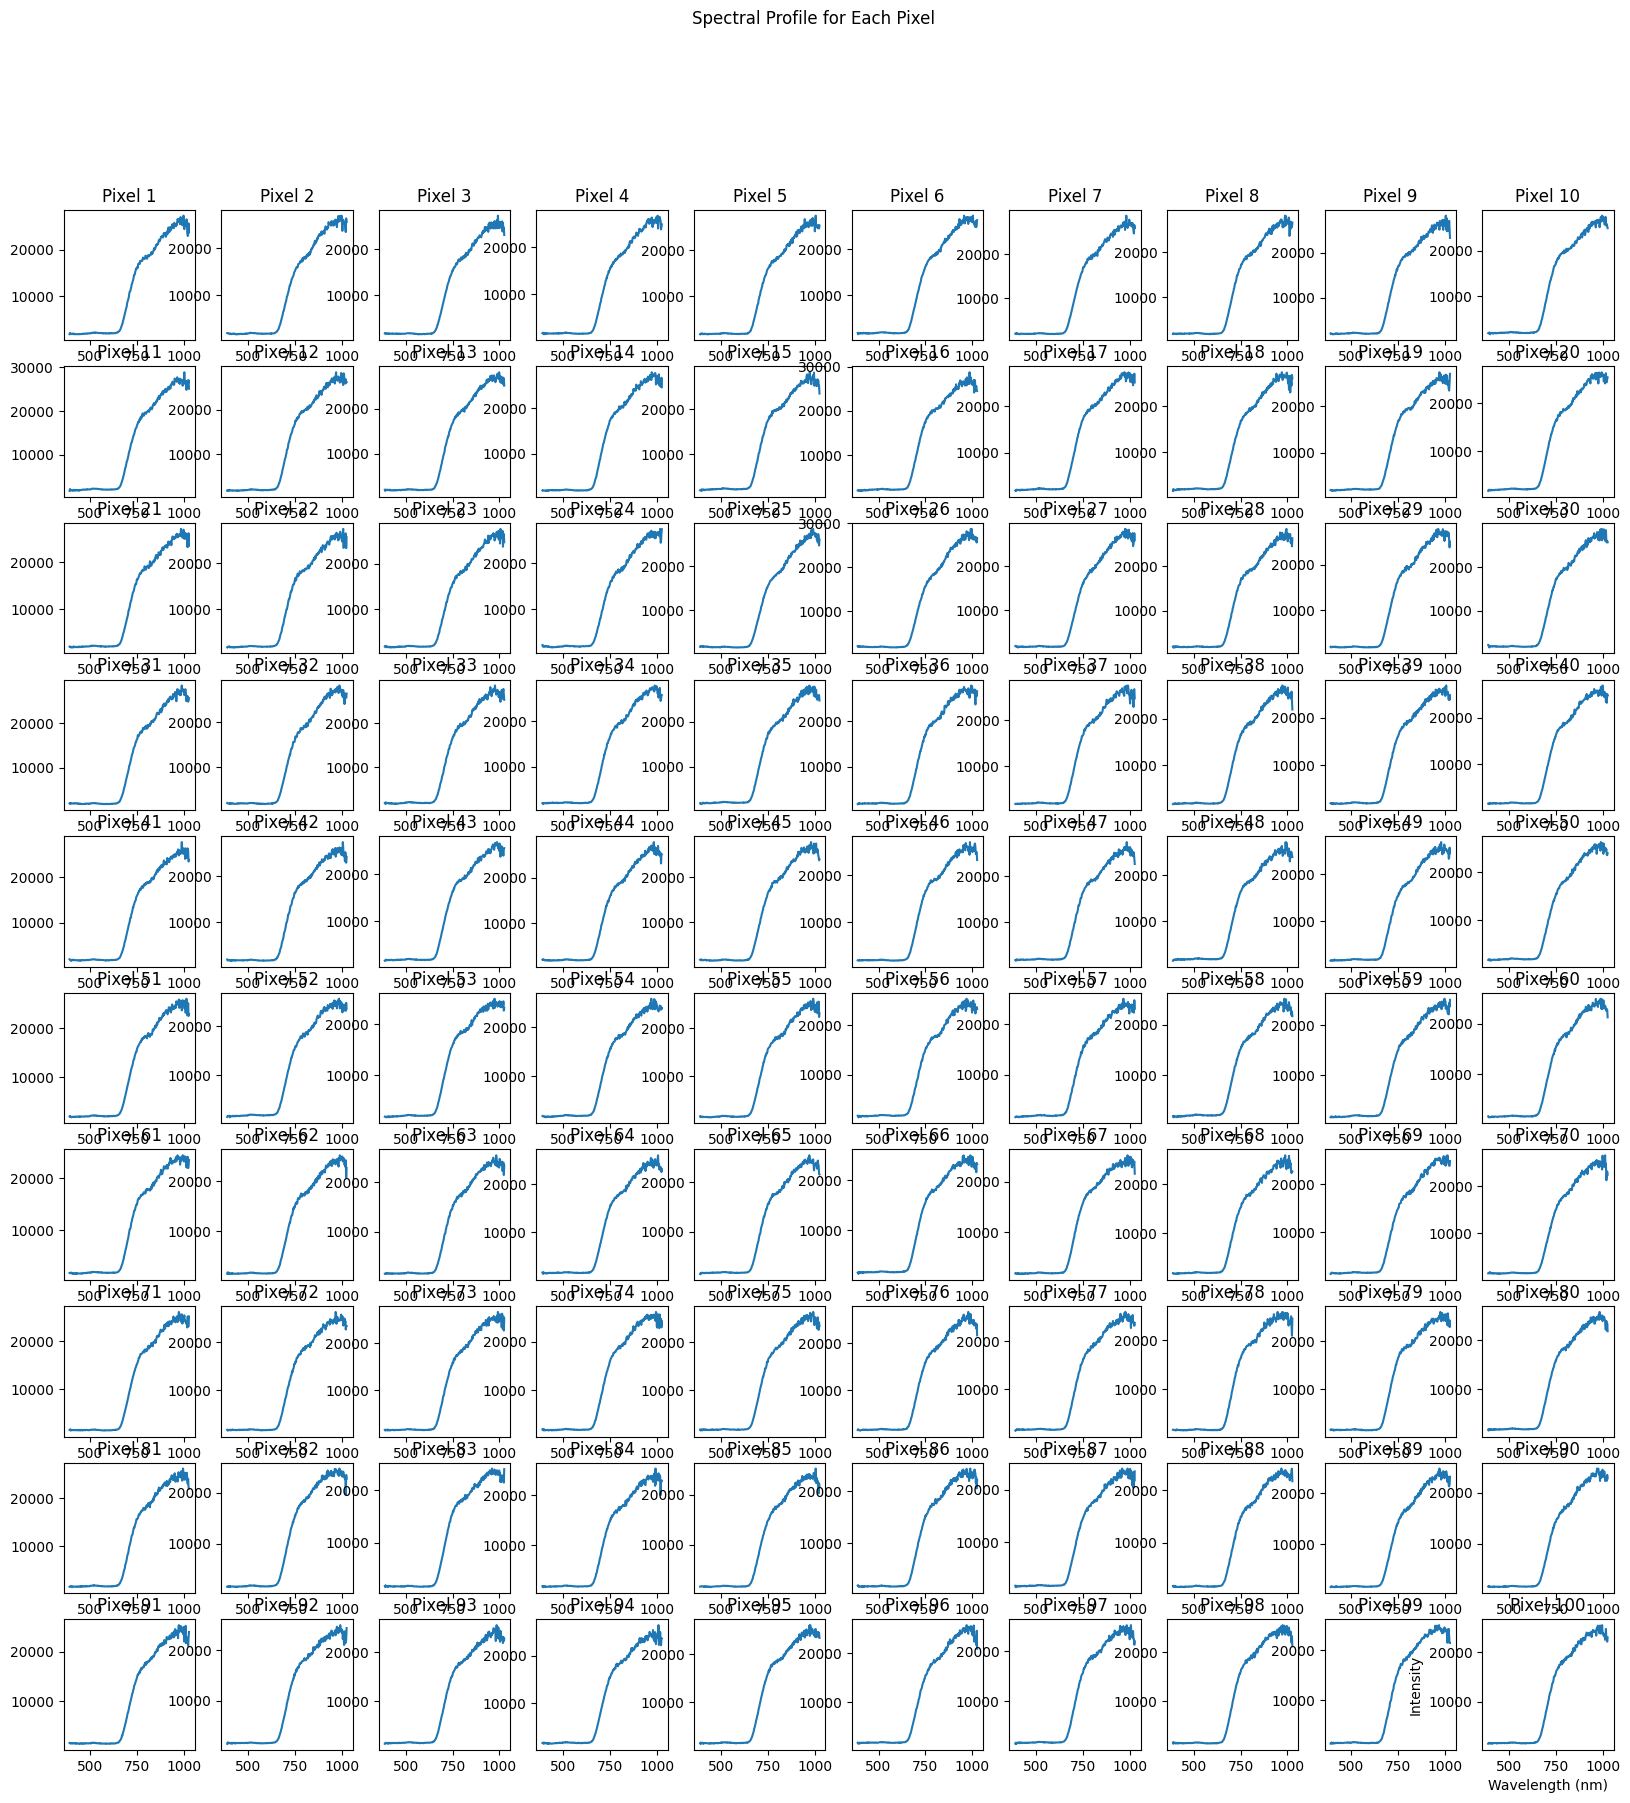

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.bil' with the actual file name
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Read the HDR file to get wavelength information
hdr_metadata = {}
with open(hdr_file_path, 'r') as hdr_file:
    for line in hdr_file:
        # Skip lines without '='
        if '=' not in line:
            continue
        
        key, *value_parts = map(str.strip, line.split('='))
        value = '='.join(value_parts)
        hdr_metadata[key] = value

# Extract and convert wavelength information from the HDR metadata
wavelength_str = hdr_metadata['wavelength'][1:-1]  # Remove curly braces
wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

# Create subplots for each pixel
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))

# Plot the spectral profile for each pixel
for i, ax in enumerate(axs.flatten()):
    pixel_data = data[:, i // 900, i % 900]  # Extract data for the current pixel
    ax.plot(wavelengths, pixel_data)
    ax.set_title(f'Pixel {i+1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.suptitle('Spectral Profile for Each Pixel')
plt.show()


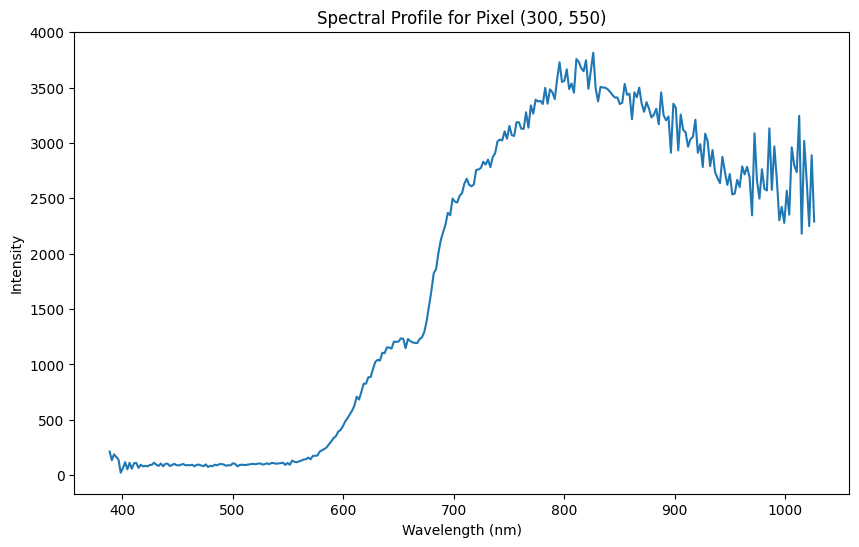

In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.bil' with the actual file name
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Read the HDR file to get wavelength information
hdr_metadata = {}
with open(hdr_file_path, 'r') as hdr_file:
    for line in hdr_file:
        if '=' not in line:
            continue
        key, *value_parts = map(str.strip, line.split('='))
        value = '='.join(value_parts)
        hdr_metadata[key] = value

# Extract and convert wavelength information from the HDR metadata
wavelength_str = hdr_metadata['wavelength'][1:-1]  # Remove curly braces
wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
# 550 X 900
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, data[:, pixel_index[0], pixel_index[1]])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index}')
plt.show()

# 100 PIXELS VISUALIZED

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.bil' with the actual file name
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Read the HDR file to get wavelength information
hdr_metadata = {}
with open(hdr_file_path, 'r') as hdr_file:
    for line in hdr_file:
        if '=' not in line:
            continue
        key, *value_parts = map(str.strip, line.split('='))
        value = '='.join(value_parts)
        hdr_metadata[key] = value

# Extract and convert wavelength information from the HDR metadata
wavelength_str = hdr_metadata['wavelength'][1:-1]  # Remove curly braces
wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
# 550 X 900
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, data[:, pixel_index[0], pixel_index[1]])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index}')
plt.show()

# Visualize spectral profiles for 100 pixels
num_pixels = 10
plt.figure(figsize=(12, 8))
for i in range(num_pixels):
    plt.plot(wavelengths, data[:, i, i], label=f'Pixel {i+1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profiles for {num_pixels} Pixels')
plt.legend()
plt.show()


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.bil' with the actual file name
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Read the HDR file to get wavelength information
hdr_metadata = {}
with open(hdr_file_path, 'r') as hdr_file:
    for line in hdr_file:
        if '=' not in line:
            continue
        key, *value_parts = map(str.strip, line.split('='))
        value = '='.join(value_parts)
        hdr_metadata[key] = value

# Extract and convert wavelength information from the HDR metadata
wavelength_str = hdr_metadata['wavelength'][1:-1]  # Remove curly braces
wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
# 550 X 900
pixel_index = (300, 550)

# Filter wavelengths between 600 and 1000 nm
wavelength_mask = (wavelengths >= 400) & (wavelengths <= 1000)
filtered_wavelengths = wavelengths[wavelength_mask]

# Plot the spectral profile for the chosen pixel with filtered wavelengths
plt.figure(figsize=(10, 6))
plt.plot(filtered_wavelengths, data[wavelength_mask, pixel_index[0], pixel_index[1]])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} (600-1000 nm)')
plt.show()

# Visualize spectral profiles for 10 pixels with filtered wavelengths
num_pixels = 40000
plt.figure(figsize=(12, 8))
for i in range(num_pixels):
    plt.plot(filtered_wavelengths, data[wavelength_mask, i, i], label=f'Pixel {i+1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profiles for {num_pixels} Pixels (600-1000 nm)')
plt.legend()
plt.show()


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.bil' with the actual file name
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Read the HDR file to get wavelength information
hdr_metadata = {}
with open(hdr_file_path, 'r') as hdr_file:
    for line in hdr_file:
        if '=' not in line:
            continue
        key, *value_parts = map(str.strip, line.split('='))
        value = '='.join(value_parts)
        hdr_metadata[key] = value

# Extract and convert wavelength information from the HDR metadata
wavelength_str = hdr_metadata['wavelength'][1:-1]  # Remove curly braces
wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
# 550 X 900
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, data[:, pixel_index[0], pixel_index[1]])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index}')
plt.show()

# Visualize spectral profiles for 100 pixels
num_pixels = 10
plt.figure(figsize=(12, 8))
for i in range(num_pixels):
    plt.plot(wavelengths, data[:, i, i], label=f'Pixel {i+1}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profiles for {num_pixels} Pixels')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming data is your list of images and labels is your list of corresponding labels
# Make sure data and labels are numpy arrays or can be converted to numpy arrays

data_train, data_temp, labels_train, labels_temp = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42, stratify=labels_temp)


In [ ]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
    #'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Low/A1_L2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Fresh/MA1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Fresh/MA1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/High/MA1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/High/MA1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Low/MA1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Low/MA1_L2.bil',
]

# Load data from multiple files
data_list = []
labels_list = []

for bil_file_path in file_paths:
    try:
        # Extract label from the file path
        label = bil_file_path.split(os.sep)[-2]
        labels_list.append(label)

        with rasterio.open(bil_file_path) as src:
            data = src.read()
            data_list.append(data)
    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Convert lists to numpy arrays
data = np.array(data_list)
labels = np.array(labels_list)

# Now you can use train_test_split
data_train, data_temp, labels_train, labels_temp = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42, stratify=labels_temp)


In [11]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Low/A1_L2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Fresh/MA1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Fresh/MA1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/High/MA1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/High/MA1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Low/MA1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Low/MA1_L2.bil',
]

# Load data from multiple files
data_list = []
labels_list = []

for bil_file_path in file_paths:
    try:
        # Extract label from the file name
        file_name = os.path.basename(bil_file_path)
        label = file_name.split('_')[0]  # Assuming the label is before the first underscore
        labels_list.append(label)

        with rasterio.open(bil_file_path) as src:
            data = src.read()
            data_list.append(data)
    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Convert lists to numpy arrays
data = np.array(data_list)
labels = np.array(labels_list)

# Now you can use train_test_split
data_train, data_temp, labels_train, labels_temp = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)
data_val, data_test, labels_val, labels_test = train_test_split(data_temp, labels_temp, test_size=0.5, random_state=42, stratify=labels_temp)


C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F1.bil: D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F1.bil: No such file or directory
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F2.bil: D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F2.bil: No such file or directory
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H1.bil: D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H1.bil: No such file or directory
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_sam

C:\Users\pavan\AppData\Local\Temp\ipykernel_16888\379096765.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data_list)


ValueError: could not broadcast input array from shape (300,550,900) into shape (300,)

In [2]:
import os

import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
  #  'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F1.bil',
   # 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Fresh/A1_F2.bil',
   # 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H1.bil',
  #  'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/High/A1_H2.bil',
   # 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Low/A1_L1.bil',
  #  'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Fungicide_Apple/Fungicide_Apple/Low/A1_L2.bil',
  #  'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Fresh/MA1_F1.bil',
  #  'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Fresh/MA1_F2.bil',
  #  'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/High/MA1_H1.bil',
  #  'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/High/MA1_H2.bil',
   # 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Low/MA1_L1.bil',
   # 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Pesticide_Apple/Pesticide_Apple/Low/MA1_L2.bil',
]

# Load data from multiple files
data_list = []
labels_list = []

for bil_file_path in file_paths:
    if not os.path.exists(bil_file_path):
        print(f"File not found: {bil_file_path}")
        continue

    try:
        # Extract label from the file name
        file_name = os.path.basename(bil_file_path)
        label = file_name.split('_')[0]  # Assuming the label is before the first underscore
        labels_list.append(label)

        with rasterio.open(bil_file_path) as src:
            data = src.read()
            data_list.append(data)
    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")


C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [16]:
data_list

[array([[[ 1704,  1846,  1756, ...,  4453,  4138,  4520],
         [ 1884,  1891,  1983, ...,  4751,  5326,  4826],
         [ 1749,  1981,  1801, ...,  3558,  4138,  3602],
         ...,
         [ 1478,  1485,  1575, ...,  4453,  4732,  5438],
         [ 1794,  1620,  1665, ...,  4751,  4138,  4214],
         [ 1704,  1756,  1484, ...,  5646,  4435,  4520]],
 
        [[ 1975,  1803,  1653, ...,  4331,  5657,  5958],
         [ 1785,  1878,  1954, ...,  4058,  4846,  4873],
         [ 1823,  1803,  1841, ...,  4331,  5117,  4330],
         ...,
         [ 1443,  1352,  1464, ...,  4331,  5387,  3788],
         [ 1481,  1578,  1502, ...,  4058,  4036,  4330],
         [ 1633,  1615,  1540, ...,  4058,  4576,  4602]],
 
        [[ 1890,  1825,  1719, ...,  5147,  5131,  5130],
         [ 1665,  1890,  1879, ...,  5147,  6116,  4885],
         [ 1858,  1954,  1815, ...,  5883,  5377,  5619],
         ...,
         [ 1473,  1633,  1560, ...,  4165,  4638,  4885],
         [ 1762,  1697, 

In [15]:
labels_list

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 'APP1',
 'APP1',
 'APP1',
 'APP1',
 'A1',
 'A1',
 'A1',
 'A1',
 'A1',
 'A1']

In [ ]:
import spectral

# Function to read metadata from a .hdr file
def read_hdr_metadata(hdr_path):
    header = spectral.envi.read_envi_header(hdr_path)
    return header

# List of paths to your .hdr files
hdr_files = [
    "path/to/your/hdr/files/file1.hdr",
    "path/to/your/hdr/files/file2.hdr",
    # Add more file paths as needed
]

# Read metadata from the first file as the reference
reference_metadata = read_hdr_metadata(hdr_files[0])

# List to store files with differing metadata
differing_files = []

# Compare metadata of each file with the reference
for hdr_file in hdr_files[1:]:
    current_metadata = read_hdr_metadata(hdr_file)

    # Check if the metadata is different
    if current_metadata != reference_metadata:
        differing_files.append(hdr_file)

# Display the results
if not differing_files:
    print("Metadata is consistent across all files.")
else:
    print("Files with differing metadata:")
    for file in differing_files:
        print(file)


In [23]:
# import spectral

# # Function to read metadata from a .hdr file
# def read_hdr_metadata(hdr_path):
#     header = spectral.envi.read_envi_header(hdr_path)
#     return header

# # List of paths to your .hdr files
# hdr_files = [
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil.hdr',
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil.hdr',
# ]

# # Read metadata from the first file as the reference
# reference_metadata = read_hdr_metadata(hdr_files[0])

# # List to store files with differing metadata
# differing_files = []

# # Compare metadata of each file with the reference
# for hdr_file in hdr_files[1:]:
#     current_metadata = read_hdr_metadata(hdr_file)

#     # Check if the metadata is different
#     if current_metadata != reference_metadata:
#         differing_files.append(hdr_file)

# # Display the results
# if not differing_files:
#     print("Metadata is consistent across all files.")
# else:
#     print("Files with differing metadata:")
#     for file in differing_files:
#         print(file)

        
        
import spectral

# Function to read metadata from a .hdr file
def read_hdr_metadata(hdr_path):
    header = spectral.envi.read_envi_header(hdr_path)
    return header

# List of paths to your .hdr files
hdr_files = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil.hdr',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil.hdr',
]

# Dictionary to store baseline metadata
baseline_metadata = {}

# Read metadata from the first file as the reference
reference_metadata = read_hdr_metadata(hdr_files[0])

# Populate baseline metadata
for key, value in reference_metadata.items():
    baseline_metadata[key] = value

# Check and update baseline metadata from other files
for hdr_file in hdr_files[1:]:
    current_metadata = read_hdr_metadata(hdr_file)

    # Check each parameter
    for key, value in current_metadata.items():
        if key in baseline_metadata and baseline_metadata[key] != value:
            baseline_metadata[key] = "Varying"

# Display the baseline metadata
print("Baseline Metadata:")
for key, value in baseline_metadata.items():
    print(f"{key}: {value}")


Baseline Metadata:
interleave: bil
data type: 12
lines: Varying
samples: 900
bands: 300
sample binning: 1
spectral binning: 2
line binning: 1
shutter: Varying
gain: Varying
framerate: Varying
imager serial number: 100121-246
byte order: 0
header offset: 0
wavelength: ['388.85', '390.85', '392.85', '394.86', '396.87', '398.87', '400.88', '402.89', '404.9', '406.91', '408.92', '410.94', '412.95', '414.97', '416.98', '419.0', '421.01', '423.03', '425.05', '427.07', '429.09', '431.11', '433.13', '435.16', '437.18', '439.2', '441.23', '443.26', '445.28', '447.31', '449.34', '451.37', '453.4', '455.43', '457.46', '459.5', '461.53', '463.57', '465.6', '467.64', '469.68', '471.71', '473.75', '475.79', '477.83', '479.88', '481.92', '483.96', '486.01', '488.05', '490.1', '492.14', '494.19', '496.24', '498.29', '500.34', '502.39', '504.44', '506.49', '508.55', '510.6', '512.66', '514.71', '516.77', '518.83', '520.89', '522.95', '525.01', '527.07', '529.13', '531.19', '533.26', '535.32', '537.39',

In [20]:
data_list

[array([[ 1704,  1975,  1890, ..., 23060, 25661, 23756],
        [ 1846,  1803,  1825, ..., 23440, 26358, 25608],
        [ 1756,  1653,  1719, ..., 24217, 24749, 23136],
        ...,
        [ 5646,  4058,  5392, ..., 10029, 10120, 10410],
        [ 4435,  4576,  4885, ...,  9200, 10201,  9541],
        [ 4520,  4602,  4641, ...,  9635, 11053,  9449]], dtype=uint16),
 array([[ 1929,  1899,  1762, ..., 25515, 24883, 25108],
        [ 2026,  1766,  1922, ..., 24674, 26620, 24493],
        [ 1892,  1766,  1783, ..., 23970, 23959, 24772],
        ...,
        [ 4453,  4877,  4656, ..., 10683,  9669,  8989],
        [ 4732,  4846,  5131, ..., 10485, 10898,  9075],
        [ 4826,  4059,  4885, ..., 10493, 10592,  9449]], dtype=uint16),
 array([[ 4084,  4463,  4270, ..., 14739, 14534, 14403],
        [ 3633,  3774,  3911, ..., 17017, 16397, 15203],
        [ 3766,  3655,  3606, ..., 17749, 19203, 17874],
        ...,
        [  994,   960,  1040, ..., 15613, 16226, 14957],
        [ 1110,  

In [21]:
labels_list

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 'APP1',
 'APP1',
 'APP1',
 'APP1',
 'A1',
 'A1',
 'A1',
 'A1',
 'A1',
 'A1']

In [24]:
from sklearn.decomposition import PCA

# Assuming data_list contains your hyperspectral data
# Choose the number of components based on how much variance you want to retain
n_components = 50  # Adjust as needed
pca = PCA(n_components=n_components)
data_list_pca = pca.fit_transform(data_list)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (16,) + inhomogeneous part.

In [25]:
for data in data_list:
    print(data.shape)


(495000, 300)
(495000, 300)
(495000, 300)
(495000, 300)
(495000, 300)
(495000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)


In [4]:
# Check unique values in labels_list
unique_labels = set(labels_list)
print("Unique Labels:", unique_labels)

# Update label_mapping based on unique labels
label_mapping = {label: index for index, label in enumerate(unique_labels)}

# Now, convert class labels to numerical labels
y = [label_mapping[label] for label in labels_list]


Unique Labels: {'A1', '1', 'APP1'}


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_list contains the spectral data and labels_list contains the corresponding labels

# Flatten the data to create a 2D array (samples x features)
X = [spectral_data.flatten() for spectral_data in data_list]

# Convert class labels to numerical labels
label_mapping = {'fresh': 0, 'high_concentration': 1, 'low_concentration': 2, 'unknown': 3}
y = [label_mapping[label] for label in labels_list]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

# Visualize the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


KeyError: '1'

In [27]:
from sklearn.decomposition import IncrementalPCA

# Assuming data_list contains your hyperspectral data
data_matrix = np.vstack(data_list)

# Specify the number of components you want
n_components = 50  # Adjust as needed

# Specify the batch size for incremental PCA
batch_size = 1000  # Adjust as needed

# Create incremental PCA model
ipca = IncrementalPCA(n_components=n_components)

# Process data in batches
for i in range(0, data_matrix.shape[0], batch_size):
    batch = data_matrix[i:i+batch_size, :]
    ipca.partial_fit(batch)

# Transform the entire dataset
data_matrix_pca = ipca.transform(data_matrix)

# Method 1: Variance Retained
explained_var_ratio = ipca.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_var_ratio)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cumulative_explained_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Retained')

# Method 2: Elbow Method
plt.subplot(1, 2, 2)
plt.plot(explained_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [5]:
# import os
# import rasterio
# import numpy as np
# from sklearn.model_selection import train_test_split

# # List of file paths
# file_paths = [
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',#
#     'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',#
# ]

# # Load data from multiple files
# data_list = []
# labels_list = []

# for bil_file_path in file_paths:
#     if not os.path.exists(bil_file_path):
#         print(f"File not found: {bil_file_path}")
#         continue

#     try:
#         # Extract label from the file name
#         file_name = os.path.basename(bil_file_path)
#         label = file_name.split('_')[0]  # Assuming the label is before the first underscore
#         labels_list.append(label)

#         with rasterio.open(bil_file_path) as src:
#             # Read data as a 3D array (bands, rows, columns)
#             data = src.read()

#             # Reshape the data to (bands, -1) to flatten the spatial dimensions
#             data = data.reshape(data.shape[0], -1)

#             # Transpose the data to have shape (-1, bands) for sklearn compatibility
#             data = data.transpose()

#             data_list.append(data)
#     except Exception as e:
#         print(f"Error processing {bil_file_path}: {e}")

# # Convert lists to numpy arrays
# data = np.concatenate(data_list, axis=0)
# labels = np.array(labels_list)

# # Now you can use train_test_split or any other processing on the data and labels
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]

# Load data from multiple files
data_list = []
labels_list = []

for bil_file_path in file_paths:
    if not os.path.exists(bil_file_path):
        print(f"File not found: {bil_file_path}")
        continue

    try:
        # Extract label from the file path
        label = None
        if "Fresh" in bil_file_path:
            label = "fresh"
        elif "High" in bil_file_path:
            label = "high"
        elif "Low" in bil_file_path:
            label = "low"
        elif "Unknown" in bil_file_path:
            label = "Unknown"
            

        if label is not None:
            labels_list.append(label)
        else:
            print(f"Label not found in file path: {bil_file_path}")

        with rasterio.open(bil_file_path) as src:
            # Read data as a 3D array (bands, rows, columns)
            data = src.read()

            # Reshape the data to (bands, -1) to flatten the spatial dimensions
            data = data.reshape(data.shape[0], -1)

            # Transpose the data to have shape (-1, bands) for sklearn compatibility
            data = data.transpose()

            data_list.append(data)
    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Convert lists to numpy arrays
data = np.concatenate(data_list, axis=0)
labels = np.array(labels_list)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [6]:
for data in data_list:
    print(data.shape)


(495000, 300)
(495000, 300)
(495000, 300)
(495000, 300)
(495000, 300)
(495000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)
(405000, 300)


In [7]:
labels_list

['fresh',
 'fresh',
 'high',
 'high',
 'low',
 'low',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'fresh',
 'fresh',
 'high',
 'high',
 'low',
 'low']

In [9]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]

# Load data from multiple files
data_list = []
labels_list = []

unknown_data_list = []
unknown_labels_list = []

for bil_file_path in file_paths:
    if not os.path.exists(bil_file_path):
        print(f"File not found: {bil_file_path}")
        continue

    try:
        # Extract label from the file path
        label = None
        if "Fresh" in bil_file_path:
            label = "fresh"
        elif "High" in bil_file_path:
            label = "high"
        elif "Low" in bil_file_path:
            label = "low"
        elif "Unknown" in bil_file_path:
            label = "unknown"

        if label is not None:
            if label == "unknown":
                unknown_labels_list.append(label)
                with rasterio.open(bil_file_path) as src:
                    data = src.read()
                    data = data.reshape(data.shape[0], -1)
                    data = data.transpose()
                    unknown_data_list.append(data)
            else:
                labels_list.append(label)
                with rasterio.open(bil_file_path) as src:
                    data = src.read()
                    data = data.reshape(data.shape[0], -1)
                    data = data.transpose()
                    data_list.append(data)
        else:
            print(f"Label not found in file path: {bil_file_path}")

    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Convert lists to numpy arrays
data = np.concatenate(data_list, axis=0)
labels = np.array(labels_list)

unknown_data = np.concatenate(unknown_data_list, axis=0)
unknown_labels = np.array(unknown_labels_list)

# Split the "known" data into training and testing sets
X_train_known, X_test_known, y_train_known, y_test_known = train_test_split(data, labels, test_size=0.2, random_state=42)

# Now you can train your model on X_train_known, y_train_known and evaluate on X_test_known, y_test_known

# After training, use the model to predict the labels for "unknown" data
# unknown_predictions = your_model.predict(unknown_data)

# Now you can analyze the predictions for the "unknown" data
# For example, you can print the predicted labels for each unknown sample
# print(unknown_predictions)

# You can further process and analyze the results based on your specific requirements


ValueError: Found input variables with inconsistent numbers of samples: [5400000, 12]

In [10]:
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (5400000, 300)
Labels shape: (12,)


In [11]:
import numpy as np

# Assuming 'labels' is your original labels array
unique_labels, label_counts = np.unique(labels, return_counts=True)

print("Unique Labels:", unique_labels)
print("Label Counts:", label_counts)


Unique Labels: ['fresh' 'high' 'low']
Label Counts: [4 4 4]


In [12]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]
# Load data from multiple files
data_list = []
labels_list = []

unknown_data_list = []
unknown_labels_list = []

for bil_file_path in file_paths:
    if not os.path.exists(bil_file_path):
        print(f"File not found: {bil_file_path}")
        continue

    try:
        # Extract label from the file path
        label = None
        if "Fresh" in bil_file_path:
            label = "fresh"
        elif "High" in bil_file_path:
            label = "high"
        elif "Low" in bil_file_path:
            label = "low"
        elif "Unknown" in bil_file_path:
            label = "unknown"

        if label in ["fresh", "high", "low"]:
            with rasterio.open(bil_file_path) as src:
                # Read data as a 3D array (bands, rows, columns)
                data = src.read()

                # Reshape the data to (bands, -1) to flatten the spatial dimensions
                data = data.reshape(data.shape[0], -1)

                # Transpose the data to have shape (-1, bands) for sklearn compatibility
                data = data.transpose()

                data_list.append(data)
                labels_list.append(label)
        else:
            # For "unknown" category
            with rasterio.open(bil_file_path) as src:
                data = src.read()
                data = data.reshape(data.shape[0], -1)
                data = data.transpose()
                unknown_data_list.append(data)
                unknown_labels_list.append(label)

    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Convert lists to numpy arrays for the "known" category
data = np.concatenate(data_list, axis=0)
labels = np.array(labels_list)

# Now you can use train_test_split for the "known" data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape:", X_train.shape)
print("Known Labels shape:", y_train.shape)
print("Unique Labels:", np.unique(labels))


ValueError: Found input variables with inconsistent numbers of samples: [5400000, 12]

In [13]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]

# Load data from multiple files
data_list = []
labels_list = []

unknown_data_list = []
unknown_labels_list = []

for bil_file_path in file_paths:
    if not os.path.exists(bil_file_path):
        print(f"File not found: {bil_file_path}")
        continue

    try:
        # Extract label from the file path
        label = None
        if "Fresh" in bil_file_path:
            label = "fresh"
        elif "High" in bil_file_path:
            label = "high"
        elif "Low" in bil_file_path:
            label = "low"
        elif "Unknown" in bil_file_path:
            label = "unknown"

        if label in ["fresh", "high", "low"]:
            with rasterio.open(bil_file_path) as src:
                # Read data as a 3D array (bands, rows, columns)
                data = src.read()

                # Reshape the data to (bands, -1) to flatten the spatial dimensions
                data = data.reshape(data.shape[0], -1)

                # Transpose the data to have shape (-1, bands) for sklearn compatibility
                data = data.transpose()

                data_list.append(data)
                labels_list.append(label)
        else:
            # For "unknown" category
            with rasterio.open(bil_file_path) as src:
                data = src.read()
                data = data.reshape(data.shape[0], -1)
                data = data.transpose()
                unknown_data_list.append(data)
                unknown_labels_list.append(label)

    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Convert lists to numpy arrays for the "known" category
data = np.concatenate(data_list, axis=0)
labels = np.array(labels_list)

# Print shapes and unique labels for verification
print("Known Data shape:", data.shape)
print("Known Labels shape:", labels.shape)
print("Unique Labels:", np.unique(labels))

# Now you can use train_test_split for the "known" data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape after split:", X_train.shape)
print("Known Labels shape after split:", y_train.shape)
print("Unique Labels after split:", np.unique(y_train))


MemoryError: Unable to allocate 3.02 GiB for an array with shape (5400000, 300) and data type uint16

In [14]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set the number of samples to use for training and testing
num_samples = 1000  # Adjust this number based on your available memory

# Convert lists to numpy arrays for the "known" category
data = np.concatenate(data_list[:num_samples], axis=0)
labels = np.array(labels_list[:num_samples])

# Print shapes and unique labels for verification
print("Known Data shape before split:", data.shape)
print("Known Labels shape before split:", labels.shape)
print("Unique Labels before split:", np.unique(labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Initialize the SGDClassifier with a stochastic gradient descent optimizer
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Train the model in batches
batch_size = 100
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(labels))

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Now you can use train_test_split for the "known" data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape after split:", X_train.shape)
print("Known Labels shape after split:", y_train.shape)
print("Unique Labels after split:", np.unique(y_train))


Known Data shape before split: (5400000, 300)
Known Labels shape before split: (12,)
Unique Labels before split: ['fresh' 'high' 'low']


ValueError: Found input variables with inconsistent numbers of samples: [5400000, 12]

In [15]:
data_list

[array([[ 1704,  1975,  1890, ..., 23060, 25661, 23756],
        [ 1846,  1803,  1825, ..., 23440, 26358, 25608],
        [ 1756,  1653,  1719, ..., 24217, 24749, 23136],
        ...,
        [ 5646,  4058,  5392, ..., 10029, 10120, 10410],
        [ 4435,  4576,  4885, ...,  9200, 10201,  9541],
        [ 4520,  4602,  4641, ...,  9635, 11053,  9449]], dtype=uint16),
 array([[ 1929,  1899,  1762, ..., 25515, 24883, 25108],
        [ 2026,  1766,  1922, ..., 24674, 26620, 24493],
        [ 1892,  1766,  1783, ..., 23970, 23959, 24772],
        ...,
        [ 4453,  4877,  4656, ..., 10683,  9669,  8989],
        [ 4732,  4846,  5131, ..., 10485, 10898,  9075],
        [ 4826,  4059,  4885, ..., 10493, 10592,  9449]], dtype=uint16),
 array([[ 4084,  4463,  4270, ..., 14739, 14534, 14403],
        [ 3633,  3774,  3911, ..., 17017, 16397, 15203],
        [ 3766,  3655,  3606, ..., 17749, 19203, 17874],
        ...,
        [  994,   960,  1040, ..., 15613, 16226, 14957],
        [ 1110,  

In [16]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set the number of samples to use for training and testing
num_samples = 1000  # Adjust this number based on your available memory

# Convert lists to numpy arrays for the "known" category
data = np.concatenate(data_list[:num_samples], axis=0)
labels = np.array(labels_list[:num_samples])

# Print shapes and unique labels for verification
print("Known Data shape:", data.shape)
print("Known Labels shape:", labels.shape)
print("Unique Labels:", np.unique(labels))

# Now you can use train_test_split for the "known" data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape after split:", X_train.shape)
print("Known Labels shape after split:", y_train.shape)
print("Unique Labels after split:", np.unique(y_train))

# Initialize the SGDClassifier with a stochastic gradient descent optimizer
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Train the model in batches
batch_size = 100
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(labels))

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Known Data shape: (5400000, 300)
Known Labels shape: (12,)
Unique Labels: ['fresh' 'high' 'low']


ValueError: Found input variables with inconsistent numbers of samples: [5400000, 12]

In [17]:
# Print shapes of arrays in data_list
for i, array in enumerate(data_list):
    print(f"Array {i + 1} shape: {array.shape}")


Array 1 shape: (495000, 300)
Array 2 shape: (495000, 300)
Array 3 shape: (495000, 300)
Array 4 shape: (495000, 300)
Array 5 shape: (495000, 300)
Array 6 shape: (495000, 300)
Array 7 shape: (405000, 300)
Array 8 shape: (405000, 300)
Array 9 shape: (405000, 300)
Array 10 shape: (405000, 300)
Array 11 shape: (405000, 300)
Array 12 shape: (405000, 300)


In [18]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert lists to numpy arrays for the "known" category
data = np.concatenate(data_list, axis=0)
labels = np.array(labels_list)

# Print shapes and unique labels for verification
print("Known Data shape:", data.shape)
print("Known Labels shape:", labels.shape)
print("Unique Labels:", np.unique(labels))

# Now you can use train_test_split for the "known" data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape after split:", X_train.shape)
print("Known Labels shape after split:", y_train.shape)
print("Unique Labels after split:", np.unique(y_train))

# Initialize the SGDClassifier with a stochastic gradient descent optimizer
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Train the model in batches
batch_size = 100
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(labels))

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Known Data shape: (5400000, 300)
Known Labels shape: (12,)
Unique Labels: ['fresh' 'high' 'low']


ValueError: Found input variables with inconsistent numbers of samples: [5400000, 12]

In [19]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]

def data_generator(file_paths):
    for bil_file_path in file_paths:
        if not os.path.exists(bil_file_path):
            print(f"File not found: {bil_file_path}")
            continue

        try:
            label = None
            if "Fresh" in bil_file_path:
                label = "fresh"
            elif "High" in bil_file_path:
                label = "high"
            elif "Low" in bil_file_path:
                label = "low"
            elif "Unknown" in bil_file_path:
                label = "unknown"

            with rasterio.open(bil_file_path) as src:
                data = src.read()
                data = data.reshape(data.shape[0], -1)
                data = data.transpose()

                yield data, label

        except Exception as e:
            print(f"Error processing {bil_file_path}: {e}")

# Use a generator to load and process data in batches
data_generator_obj = data_generator(file_paths)

# Initialize arrays for the "known" category
data_list = []
labels_list = []

for data, label in data_generator_obj:
    data_list.append(data)
    labels_list.append(label)

# Convert lists to numpy arrays
data = np.concatenate(data_list, axis=0)
labels = np.array(labels_list)

# Print shapes and unique labels for verification
print("Known Data shape:", data.shape)
print("Known Labels shape:", labels.shape)
print("Unique Labels:", np.unique(labels))

# Now you can use train_test_split for the "known" data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape after split:", X_train.shape)
print("Known Labels shape after split:", y_train.shape)
print("Unique Labels after split:", np.unique(y_train))


Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil: Unable to allocate 232. MiB for an array with shape (300, 450, 900) and data type uint16
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil: Unable to allocate 232. MiB for an array with shape (300, 450, 900) and data type uint16
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil: Unable to allocate 232. MiB for an array with shape (300, 450, 900) and data type uint16
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil: Unable to allocate 232. MiB for an array with shape (300, 450, 900) and data type uint16
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples

MemoryError: Unable to allocate 1.89 GiB for an array with shape (3375000, 300) and data type uint16

In [20]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]
# Dictionary to store data and labels
data_dict = {}

for bil_file_path in file_paths:
    if not os.path.exists(bil_file_path):
        print(f"File not found: {bil_file_path}")
        continue

    try:
        # Extract label from the file path
        label = None
        if "Fresh" in bil_file_path:
            label = "fresh"
        elif "High" in bil_file_path:
            label = "high"
        elif "Low" in bil_file_path:
            label = "low"
        elif "Unknown" in bil_file_path:
            label = "unknown"

        with rasterio.open(bil_file_path) as src:
            # Read data as a 3D array (bands, rows, columns)
            data = src.read()

            # Reshape the data to (bands, -1) to flatten the spatial dimensions
            data = data.reshape(data.shape[0], -1)

            # Transpose the data to have shape (-1, bands) for sklearn compatibility
            data = data.transpose()

            # Assign label to the dictionary
            if label in ["fresh", "high", "low", "unknown"]:
                if label not in data_dict:
                    data_dict[label] = []

                data_dict[label].append(data)

    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Convert lists to numpy arrays
for label, data_list in data_dict.items():
    data_dict[label] = np.concatenate(data_list, axis=0)

# Split the "known" data and labels
known_labels = ["fresh", "high", "low"]
known_data = np.concatenate([data_dict[label] for label in known_labels], axis=0)
known_labels = np.concatenate([[label] * data_dict[label].shape[0] for label in known_labels], axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(known_data, known_labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape after split:", X_train.shape)
print("Known Labels shape after split:", y_train.shape)
print("Unique Labels after split:", np.unique(y_train))

# Rest of the code remains the same
# ...


MemoryError: Unable to allocate 2.41 GiB for an array with shape (4320000, 300) and data type uint16

In [26]:
for arr in data_list:
    print("Array Shape:", arr.shape)
    print("Array Data Type:", arr.dtype)
    print("Array Contents:")
    print(arr)
    print()


Array Shape: (405000, 300)
Array Data Type: uint16
Array Contents:
[[ 1816  1703  2014 ... 26565 26181 26327]
 [ 1653  1898  1709 ... 28347 26859 26928]
 [ 1815  1848  1756 ... 26008 27607 24441]
 ...
 [  542   333   330 ...  5367  3843  5214]
 [  530   384   327 ...  7083  6042  5151]
 [  683   508   330 ...  5396  7376  5920]]

Array Shape: (405000, 300)
Array Data Type: uint16
Array Contents:
[[  816   830   893 ... 17451 16090 16614]
 [  845   813   821 ... 13270 14914 15586]
 [  816   791   765 ... 12987 12094 12078]
 ...
 [  679   671   999 ... 14031 16182 15268]
 [ 1008   953  1189 ... 17596 17800 14663]
 [ 1167   908  1011 ... 15853 16243 16649]]

Array Shape: (405000, 300)
Array Data Type: uint16
Array Contents:
[[  407   458   483 ...  9438  7782  9147]
 [  495   523   483 ...  8313  8129  8719]
 [  588   561   380 ...  9246 10057  7345]
 ...
 [  877   738   628 ... 17159 15000 15030]
 [  743  1054   852 ... 14753 15765 15725]
 [  818   888   933 ... 15656 14783 16033]]

Arra

In [22]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# List of file paths
file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]

# Initialize the SGDClassifier with a stochastic gradient descent optimizer
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Define batch size for incremental learning
batch_size = 100

# Initialize an empty array to store all labels encountered
all_labels = np.array([])

# Separate "unknown" data from known data
known_data_dict = {}
unknown_data_list = []

for bil_file_path in file_paths:
    if not os.path.exists(bil_file_path):
        print(f"File not found: {bil_file_path}")
        continue

    try:
        # Extract label from the file path
        label = None
        if "Fresh" in bil_file_path:
            label = "fresh"
        elif "High" in bil_file_path:
            label = "high"
        elif "Low" in bil_file_path:
            label = "low"
        elif "Unknown" in bil_file_path:
            label = "unknown"

        with rasterio.open(bil_file_path) as src:
            # Read data as a 3D array (bands, rows, columns)
            data = src.read()

            # Reshape the data to (bands, -1) to flatten the spatial dimensions
            data = data.reshape(data.shape[0], -1)

            # Transpose the data to have shape (-1, bands) for sklearn compatibility
            data = data.transpose()

            # Train-test split only for "known" data
            if label in ["fresh", "high", "low"]:
                X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

                # Keep track of all unique labels encountered
                all_labels = np.unique(np.concatenate((all_labels, y_train), axis=None))

                # Train the model on the training set incrementally
                for i in range(0, len(X_train), batch_size):
                    X_batch = X_train[i:i + batch_size]
                    y_batch = y_train[i:i + batch_size]
                    classifier.partial_fit(X_batch, y_batch, classes=all_labels)

                # Store test data for evaluation
                unknown_data_list.append((X_test, y_test))

            elif label == "unknown":
                unknown_data_list.append((data, label))

    except Exception as e:
        print(f"Error processing {bil_file_path}: {e}")

# Combine "unknown" data for final evaluation
unknown_data_X, unknown_data_y = zip(*unknown_data_list)
unknown_data_X = np.concatenate(unknown_data_X, axis=0)
unknown_data_y = np.concatenate(unknown_data_y, axis=0)

# Make predictions on the "unknown" test set
unknown_y_pred = classifier.predict(unknown_data_X)

# Evaluate the accuracy on the "unknown" test set
unknown_accuracy = accuracy_score(unknown_data_y, unknown_y_pred)
print("Accuracy on 'unknown' data:", unknown_accuracy)


Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil: Found input variables with inconsistent numbers of samples: [495000, 5]
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil: Found input variables with inconsistent numbers of samples: [495000, 5]
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil: Found input variables with inconsistent numbers of samples: [495000, 4]
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil: Found input variables with inconsistent numbers of samples: [495000, 4]
Error processing D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil: Found input variables with inconsistent numbers of samples: [495000, 3]
Error processing D:/SRM/

ValueError: zero-dimensional arrays cannot be concatenated

In [14]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]

def data_generator(file_paths):
    for bil_file_path in file_paths:
        if not os.path.exists(bil_file_path):
            print(f"File not found: {bil_file_path}")
            continue

        try:
            label = None
            if "Fresh" in bil_file_path:
                label = "fresh"
            elif "High" in bil_file_path:
                label = "high"
            elif "Low" in bil_file_path:
                label = "low"
            elif "Unknown" in bil_file_path:
                label = "unknown"

            with rasterio.open(bil_file_path) as src:
                data = src.read()
                data = data.reshape(data.shape[0], -1)
                data = data.transpose()

                yield data, label

        except Exception as e:
            print(f"Error processing {bil_file_path}: {e}")

# Use a generator to load and process data in batches
data_generator_obj = data_generator(file_paths)

# Initialize arrays for the "known" category
data_list = []
labels_list = []

# Create a dictionary to map labels to indices
label_mapping = {"fresh": 1, "high": 2, "low": 3, "unknown": 4}

# Set a batch size to control memory usage
batch_size = 10

for data, label in data_generator_obj:
    # Assign label index based on the mapping
    label_index = label_mapping[label]

    data_list.append(data)
    labels_list.append(np.full((data.shape[0],), label_index))  # Assign label to each subarray

    # Process data in batches to control memory usage
    if len(data_list) == batch_size:
        # Convert lists to numpy arrays
        data_batch = np.concatenate(data_list, axis=0)
        labels_batch = np.concatenate(labels_list, axis=0)

        # Print shapes and unique labels for verification
        print(f"Batch Data shape: {data_batch.shape} -label {label_index}")
        print(f"Batch Labels shape: {labels_batch.shape} -label {label_index}")

        # Release memory
        del data_list, labels_list
        data_list, labels_list = [], []

# Convert remaining data to numpy arrays
data = np.concatenate(data_list, axis=0)
labels = np.concatenate(labels_list, axis=0)

# Corrected label_index for mapping
label_index = {v: k for k, v in label_mapping.items()}[labels[0]]

# Print final shapes and unique labels for verification
print(f"Final Data shape: {data.shape} -label {label_index}")
print(f"Final Labels shape: {labels.shape} -label {label_index}")

# Now you can use train_test_split for the "known" data and labels
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes and unique labels for verification
print("Known Data shape after split:", X_train.shape)
print("Known Labels shape after split:", y_train.shape)
print("Unique Labels after split:", np.unique(y_train))



C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Batch Data shape: (4590000, 300) -label 4
Batch Labels shape: (4590000,) -label 4
Final Data shape: (2430000, 300) -label fresh
Final Labels shape: (2430000,) -label fresh
Known Data shape after split: (1944000, 300)
Known Labels shape after split: (1944000,)
Unique Labels after split: [1 2 3]


In [13]:
labels_list

[array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([3, 3, 3, ..., 3, 3, 3]),
 array([3, 3, 3, ..., 3, 3, 3])]

In [15]:
X_train

array([[ 1111,  1199,  1199, ..., 13220, 16534, 13923],
       [ 5386,  6492,  5416, ...,  8930,  8521,  8594],
       [ 5692,  8056,  6920, ...,  9652,  9224,  9050],
       ...,
       [ 1397,  1407,  1506, ..., 17127, 14611, 13660],
       [ 1540,  1431,  1703, ...,  6510,  8224,  6595],
       [  556,   550,   836, ...,  6990,  6156,  7349]], dtype=uint16)

In [18]:
data_list

[array([[ 5219,  4652,  6562, ..., 12920,  9627, 12854],
        [ 5858,  5508,  4123, ..., 11686, 10841, 11684],
        [ 5345,  6011,  4963, ...,  9811, 10784,  9005],
        ...,
        [ 3209,  2733,  1997, ...,  2534,  3381,  3628],
        [ 4596,  1326,  1661, ...,  3273,  3087,  1916],
        [  830,  4586,  1102, ...,  3679,  3455,  3006]], dtype=uint16),
 array([[ 4360,  5154,  6117, ..., 10147, 11441, 10259],
        [ 4419,  4745,  6868, ..., 11405,  9059, 10054],
        [ 4769,  6011,  5406, ..., 11225,  9879, 12146],
        ...,
        [ 4322,  3224,  3290, ...,  2154,  2592,  2382],
        [ 2345,  2819,  3021, ...,  5959,  4295,  3166],
        [ 1988,  1423,  3897, ...,  2837,  2639,  3006]], dtype=uint16),
 array([[ 8260,  6695,  7896, ...,  9943, 13003,  9642],
        [ 8459,  7506,  7326, ...,  9202,  9976, 10749],
        [ 8502,  8732,  6581, ...,  9627, 11041,  9334],
        ...,
        [ 1113,  2578,  2055, ...,  3790,  3264,  5814],
        [ 2246,  

In [19]:
labels_list

[array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([2, 2, 2, ..., 2, 2, 2]),
 array([3, 3, 3, ..., 3, 3, 3]),
 array([3, 3, 3, ..., 3, 3, 3])]

In [1]:
import os
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split


file_paths = [
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_2PU.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_2HG.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_2LW.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/fresh/APP1_PU2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Unknown/pesticide_unknownconc/APP1_PST2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H2.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil',
    'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L2.bil',
]

def data_generator(file_paths):
    for bil_file_path in file_paths:
        if not os.path.exists(bil_file_path):
            print(f"File not found: {bil_file_path}")
            continue

        try:
            label = None
            if "Fresh" in bil_file_path:
                label = "fresh"
            elif "High" in bil_file_path:
                label = "high"
            elif "Low" in bil_file_path:
                label = "low"
            elif "Unknown" in bil_file_path:
                label = "unknown"

            with rasterio.open(bil_file_path) as src:
                data = src.read()
                data = data.reshape(data.shape[0], -1)
                data = data.transpose()

                yield data, label

        except Exception as e:
            print(f"Error processing {bil_file_path}: {e}")

# Use a generator to load and process data in batches
data_generator_obj = data_generator(file_paths)

# Initialize arrays for the "known" and "unknown" categories
known_data_list = []
known_labels_list = []
unknown_data_list = []
unknown_labels_list = []

# Create a dictionary to map labels to indices
label_mapping = {"fresh": 1, "high": 2, "low": 3, "unknown": 4}
label_counters = {label: 0 for label in label_mapping}

for data, label in data_generator_obj:
    # Assign label index based on the mapping
    label_index = label_mapping[label]

    if label == "unknown":
        unknown_data_list.append(data)
        unknown_labels_list.append(np.full((data.shape[0],), label_index))
    else:
        known_data_list.append(data)
        known_labels_list.append(np.full((data.shape[0],), label_index))
        


# Convert lists to numpy arrays for known and unknown data
known_data = np.concatenate(known_data_list, axis=0)
known_labels = np.concatenate(known_labels_list, axis=0)
unknown_data = np.concatenate(unknown_data_list, axis=0)
unknown_labels = np.concatenate(unknown_labels_list, axis=0)

# Print shapes and unique labels for verification
print(f"Known Data shape: {known_data.shape} - Labels shape: {known_labels.shape}")
print(f"Unknown Data shape: {unknown_data.shape} - Labels shape: {unknown_labels.shape}")

# Now you can use train_test_split for the "known" data and labels
X_known_train, X_known_test, y_known_train, y_known_test = train_test_split(
    known_data, known_labels, test_size=0.2, random_state=42
)

# Print shapes and unique labels for verification for known data
print("Known Data shape after split:", X_known_train.shape)
print("Known Labels shape after split:", y_known_train.shape)
print("Unique Labels for known data after split:", np.unique(y_known_train))

# You can use unknown data as needed
print(f"Unknown Data shape: {unknown_data.shape} - Labels shape: {unknown_labels.shape}")

# Entries loaded: 1
# Label Counters: {'fresh': 1, 'high': 0, 'low': 0, 'unknown': 0}
# Entries loaded: 2
# Label Counters: {'fresh': 2, 'high': 0, 'low': 0, 'unknown': 0}
# Entries loaded: 3
# Label Counters: {'fresh': 2, 'high': 1, 'low': 0, 'unknown': 0}
# Entries loaded: 4
# Label Counters: {'fresh': 2, 'high': 2, 'low': 0, 'unknown': 0}
# Entries loaded: 5
# Label Counters: {'fresh': 2, 'high': 2, 'low': 1, 'unknown': 0}
# Entries loaded: 6
# Label Counters: {'fresh': 2, 'high': 2, 'low': 2, 'unknown': 0}
# Entries loaded: 7
# Label Counters: {'fresh': 2, 'high': 2, 'low': 2, 'unknown': 1}
# Entries loaded: 8
# Label Counters: {'fresh': 2, 'high': 2, 'low': 2, 'unknown': 2}
# Entries loaded: 9
# Label Counters: {'fresh': 2, 'high': 2, 'low': 2, 'unknown': 3}
# Entries loaded: 10
# Label Counters: {'fresh': 2, 'high': 2, 'low': 2, 'unknown': 4}
# Entries loaded: 11
# Label Counters: {'fresh': 3, 'high': 2, 'low': 2, 'unknown': 4}
# Entries loaded: 12
# Label Counters: {'fresh': 4, 'high': 2, 'low': 2, 'unknown': 4}
# Entries loaded: 13
# Label Counters: {'fresh': 4, 'high': 3, 'low': 2, 'unknown': 4}
# Entries loaded: 14
# Label Counters: {'fresh': 4, 'high': 4, 'low': 2, 'unknown': 4}
# Entries loaded: 15
# Label Counters: {'fresh': 4, 'high': 4, 'low': 3, 'unknown': 4}
# Entries loaded: 16
# Label Counters: {'fresh': 4, 'high': 4, 'low': 4, 'unknown': 4}

C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Known Data shape: (5400000, 300) - Labels shape: (5400000,)
Unknown Data shape: (1620000, 300) - Labels shape: (1620000,)
Known Data shape after split: (4320000, 300)
Known Labels shape after split: (4320000,)
Unique Labels for known data after split: [1 2 3]
Unknown Data shape: (1620000, 300) - Labels shape: (1620000,)


In [33]:
unknown_data

array([[ 1816,  1703,  2014, ..., 26565, 26181, 26327],
       [ 1653,  1898,  1709, ..., 28347, 26859, 26928],
       [ 1815,  1848,  1756, ..., 26008, 27607, 24441],
       ...,
       [  687,   791,   854, ..., 13379, 13251, 15030],
       [ 1191,   895,  1032, ..., 15836, 14330, 15340],
       [  818,   941,   978, ..., 17049, 16228, 14885]], dtype=uint16)

In [35]:
data

array([[ 6128,  7040,  7798, ..., 11498, 11200, 10222],
       [ 7131,  6563,  7385, ..., 11575, 10062,  8203],
       [ 6843,  6945,  6737, ...,  9888,  9935, 10008],
       ...,
       [ 1146,  2747,   931, ...,  3393,  3522,  3406],
       [ 2374,  2187,  2701, ...,  2795,  1970,  2694],
       [ 4449,   995,  2380, ...,  2857,  2941,  1668]], dtype=uint16)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the input shape based on your data
input_shape = (300, 1)  # Assuming each data sample has 300 bands

# Create a Sequential model
model = Sequential()

# Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer with 128 filters and a kernel size of 3
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layer with 128 neurons and dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adjust dropout rate as needed

# Dense layer with 64 neurons and dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
# Adjust the number of units based on the number of unique labels
model.add(Dense(4, activation='softmax'))  # Assuming 4 unique labels

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 298, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 149, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 147, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 73, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 71, 128)           24704     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 35, 128)           0

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, TensorBoard, CSVLogger

# Define the input shape based on your data
input_shape = (300, 1)  # Assuming each data sample has 300 bands

# Create a Sequential model
model = Sequential()

# Convolutional layer with 32 filters and a kernel size of 3
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer with 64 filters and a kernel size of 3
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer with 128 filters and a kernel size of 3
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layer with 128 neurons and dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adjust dropout rate as needed

# Dense layer with 64 neurons and dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
# Adjust the number of units based on the number of unique labels
model.add(Dense(4, activation='softmax'))  # Assuming 4 unique labels

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model_working.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')
learning_rate_scheduler = LearningRateScheduler(lambda epoch: 1e-3 * (0.1 ** (epoch // 10)))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
csv_logger = CSVLogger('training.log')

# Example usage of the callbacks during model training
history = model.fit(
    X_known_train, y_known_train,
    epochs=5,
    validation_split=0.2,
    callbacks=[model_checkpoint, learning_rate_scheduler, early_stopping, tensorboard, csv_logger]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 298, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 149, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 147, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 73, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 71, 128)           24704     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 35, 128)           0

NameError: name 'X_known_train' is not defined

In [4]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_known_test, y_known_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.src.engine.sequential.Sequential object at 0x0000019BAF596C80> does not.

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Assuming you have a trained model 'model' and validation data 'X_valid', 'y_valid'
# X_valid should have shape (number of samples, number of bands)

# Baseline accuracy
baseline_accuracy = accuracy_score(unknown_labels, model.predict(unknown_data))

# Perform permutation importance analysis
result = permutation_importance(model, unknown_data, unknown_labels, n_repeats=10, random_state=0)

# Extract feature importances
importances = result.importances_mean

# Rank the bands by importance
sorted_indices = np.argsort(importances)[::-1]


50625/50625 [==============================] - 404s 8ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

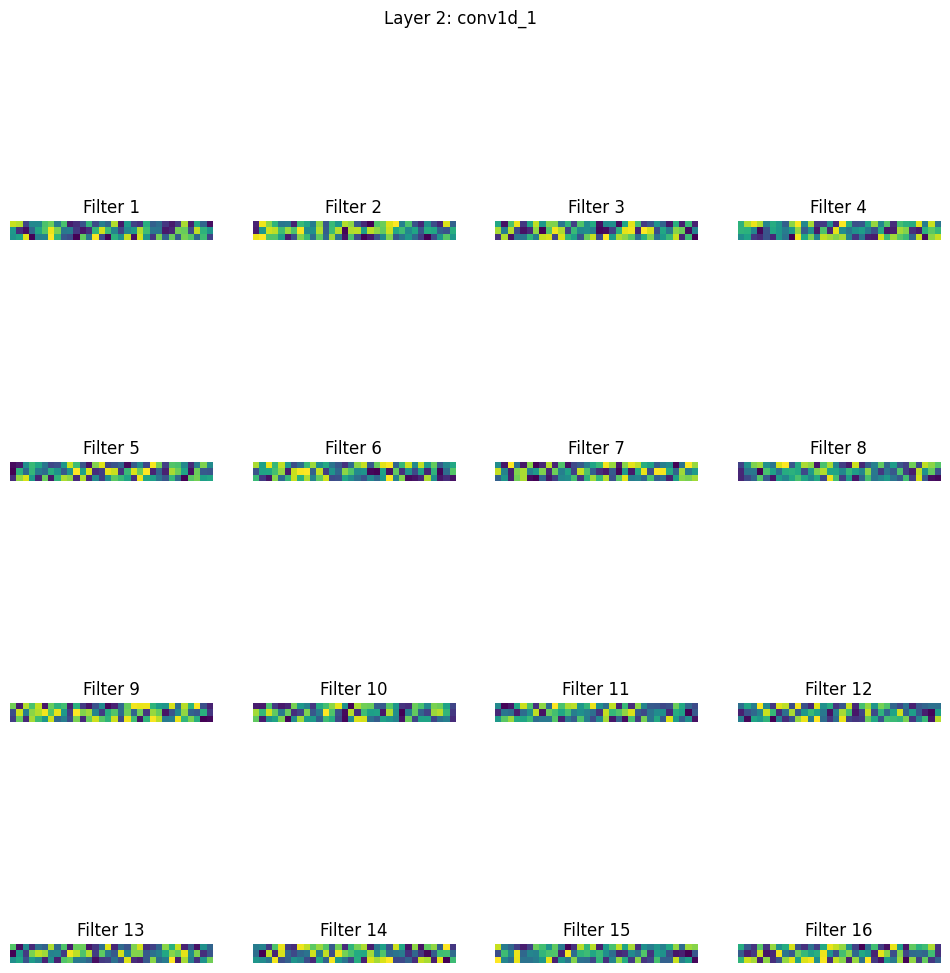

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_filters(selected_layer_index, model):
    try:
        # Get the selected layer
        selected_layer = model.layers[selected_layer_index]

        # Check if the layer has weights
        if selected_layer.get_weights():
            # Get filter weights
            filters = selected_layer.get_weights()[0]

            # Normalize weights for visualization
            filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

            # Visualize filters
            # Visualize filters
            n_filters = min(filters.shape[-1], 16)  # Limit to 16 filters for display
            rows = 4
            cols = min((n_filters + 3) // 4, 4)  # Ensure a 4x4 layout or fewer
            plt.figure(figsize=(12, 12))

            for i in range(n_filters):
                plt.subplot(rows, cols, i + 1)
                plt.imshow(filters[:, :, i], cmap='viridis')  # Adjust for your data dimensions
                plt.title(f'Filter {i+1}')
                plt.axis('off')

            plt.suptitle(f'Layer {selected_layer_index}: {selected_layer.name}')
            plt.show()

        else:
            print(f"The selected layer ({selected_layer.name}) does not have trainable weights.")
    except IndexError:
        print(f"No layer found at index {selected_layer_index}.")

# Specify the index of the layer you want to visualize
selected_layer_index = 2  # Change this to the desired layer index

# Assuming 'model' is your Keras Sequential model
visualize_filters(selected_layer_index, model)


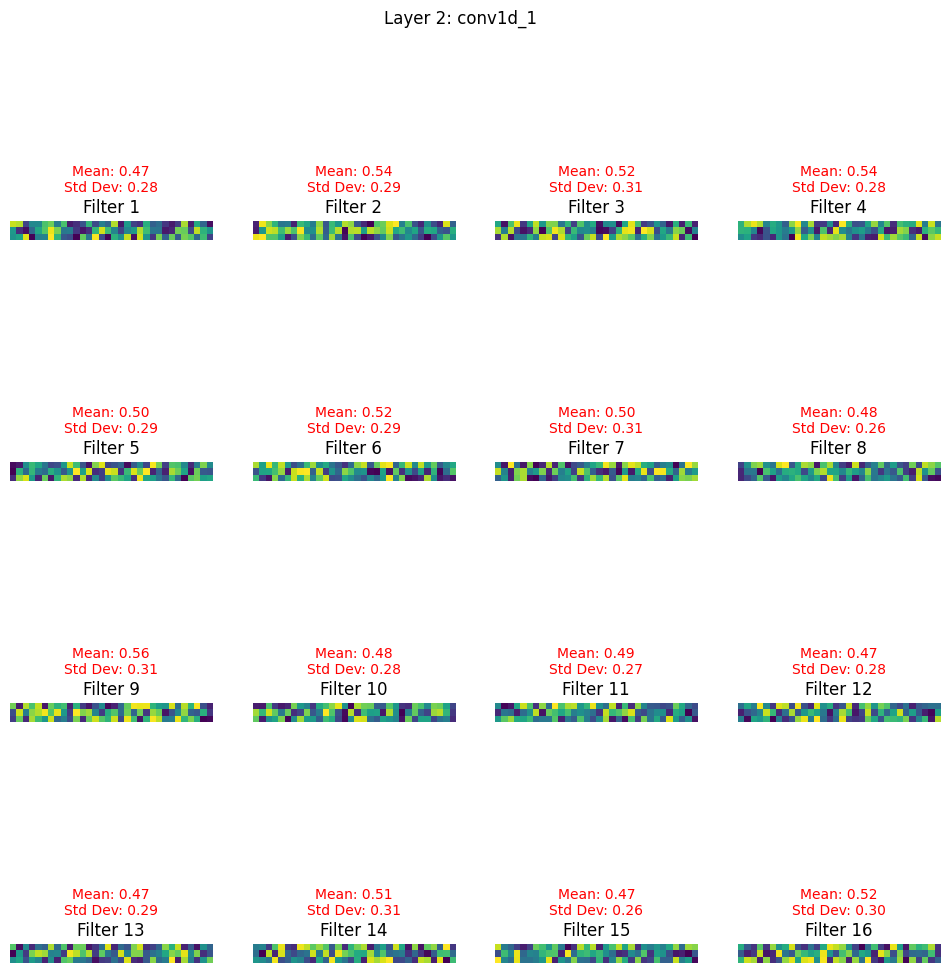

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_filters(selected_layer_index, model):
    try:
        # Get the selected layer
        selected_layer = model.layers[selected_layer_index]

        # Check if the layer has weights
        if selected_layer.get_weights():
            # Get filter weights
            filters = selected_layer.get_weights()[0]

            # Normalize weights for visualization
            filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

            # Visualize filters
            n_filters = min(filters.shape[-1], 16)  # Limit to 16 filters for display
            rows = 4
            cols = min((n_filters + 3) // 4, 4)  # Ensure a 4x4 layout or fewer
            plt.figure(figsize=(12, 12))

            for i in range(n_filters):
                plt.subplot(rows, cols, i + 1)
                plt.imshow(filters[:, :, i], cmap='viridis')  # Adjust for your data dimensions
                plt.title(f'Filter {i+1}')
                plt.axis('off')

                # Calculate and display filter statistics
                mean_value = np.mean(filters[:, :, i])
                std_dev = np.std(filters[:, :, i])
                info_text = f'Mean: {mean_value:.2f}\nStd Dev: {std_dev:.2f}'
                plt.text(0.5, 3.95, info_text, horizontalalignment='center', verticalalignment='top', transform=plt.gca().transAxes, color='red')

            plt.suptitle(f'Layer {selected_layer_index}: {selected_layer.name}')
            plt.show()

        else:
            print(f"The selected layer ({selected_layer.name}) does not have trainable weights.")
    except IndexError:
        print(f"No layer found at index {selected_layer_index}.")

# Specify the index of the layer you want to visualize
selected_layer_index = 2 # Change this to the desired layer index

# Assuming 'model' is your Keras Sequential model
visualize_filters(selected_layer_index, model)


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have already trained your model and obtained predictions
# Replace 'model.predict(X_test)' with your actual prediction code

# Get predicted labels
y_pred = model.predict(X_known_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to one-hot encoding
y_true_classes = np.argmax(y_known_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


33750/33750 [==============================] - 325s 10ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have already trained your model and obtained predictions
# Replace 'model.predict(X_test)' with your actual prediction code

# Get predicted labels
y_pred = model.predict(X_known_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to one-hot encoding if needed
# (assuming y_known_test is a 1D array)
y_true_classes = y_known_test

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


NameError: name 'model' is not defined

In [2]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the model from file
model = load_model('best_model.h5')

# Assuming you have already trained your model and obtained predictions
# Replace 'model.predict(X_test)' with your actual prediction code

# Get predicted labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to one-hot encoding if needed
# (assuming y_known_test is a 1D array)
y_true_classes = y_known_test

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x000001F905FE7C10>.

C:\Users\pavan\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


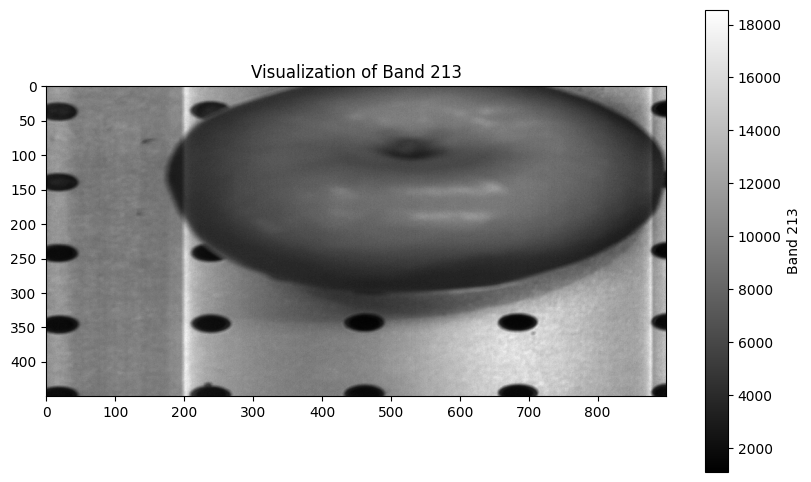

In [18]:
import rasterio
import matplotlib.pyplot as plt

# Replace 'your_file.bil' with the actual file name
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Get the number of bands
num_bands = src.count

# Choose a specific band to visualize (you can change this to any value within the number of bands)
band_index = 212

# Plot the chosen band
plt.figure(figsize=(10, 6))
plt.imshow(data[band_index, :, :], cmap='gray')
plt.colorbar(label=f'Band {band_index + 1}')
plt.title(f'Visualization of Band {band_index + 1}')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


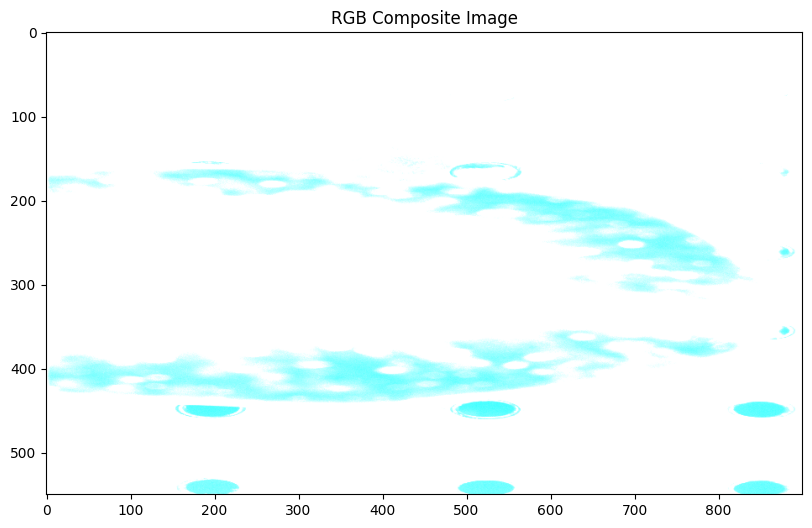

In [16]:
# Choose specific bands for a composite image
import numpy as np
red_band = 74
green_band = 176
blue_band = 173

# Plot the composite image
plt.figure(figsize=(10, 6))
plt.imshow(np.stack([data[red_band, :, :], data[green_band, :, :], data[blue_band, :, :]], axis=-1))
plt.title('RGB Composite Image')
plt.show()


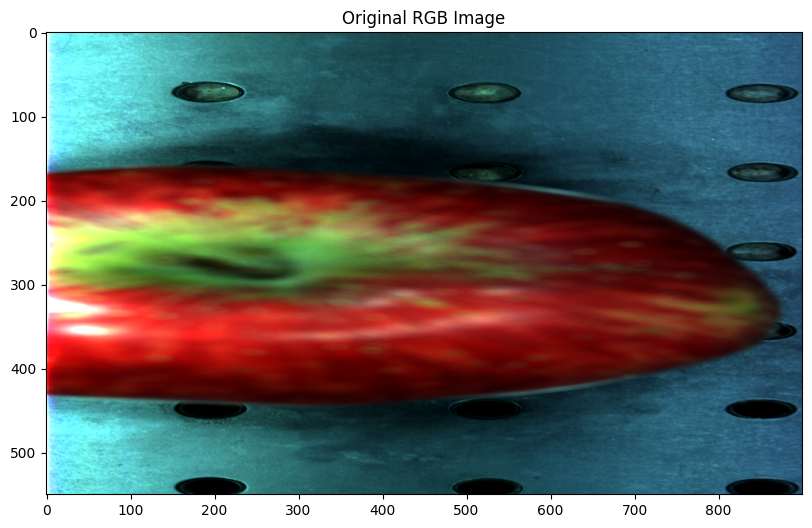

RGB values at pixel (100, 150): [ 74 176 173]


In [15]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.tif' with the actual file name
tif_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-tif/Apple-Hyperspectral images/Apple-Hyperspectral images/Apple_Samples/Nativo/High/A1_H8.tif'

with rasterio.open(tif_file_path) as src:
    original_data = src.read()

# Visualize the RGB image
plt.figure(figsize=(10, 6))
plt.imshow(np.moveaxis(original_data, 0, -1))
plt.title('Original RGB Image')
plt.show()

# Extract RGB values for a specific pixel (e.g., pixel at row=100, column=150)
row, col = 100, 150
rgb_values = original_data[:, row, col]

print(f"RGB values at pixel ({row}, {col}): {rgb_values}")


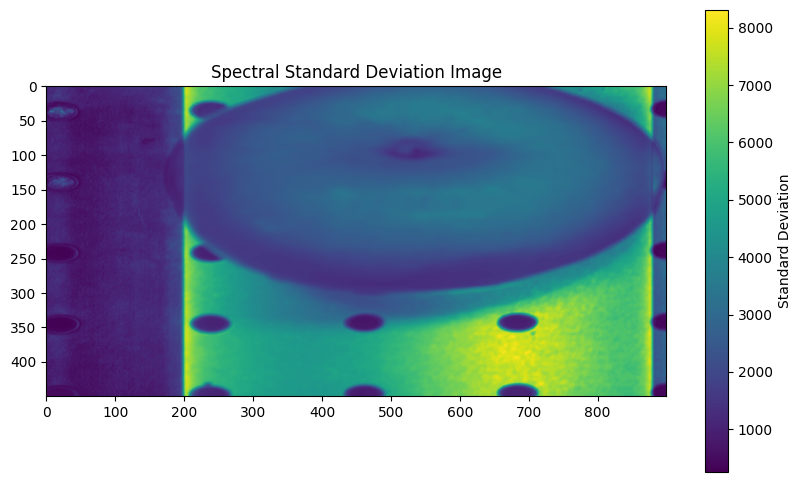

In [19]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.bil' and 'your_file.bil.hdr' with the actual file names
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'
hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Calculate the standard deviation of spectral values for each pixel
spectral_std = np.std(data, axis=0)

# Visualize the standard deviation image
plt.figure(figsize=(10, 6))
plt.imshow(spectral_std, cmap='viridis')
plt.title('Spectral Standard Deviation Image')
plt.colorbar(label='Standard Deviation')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


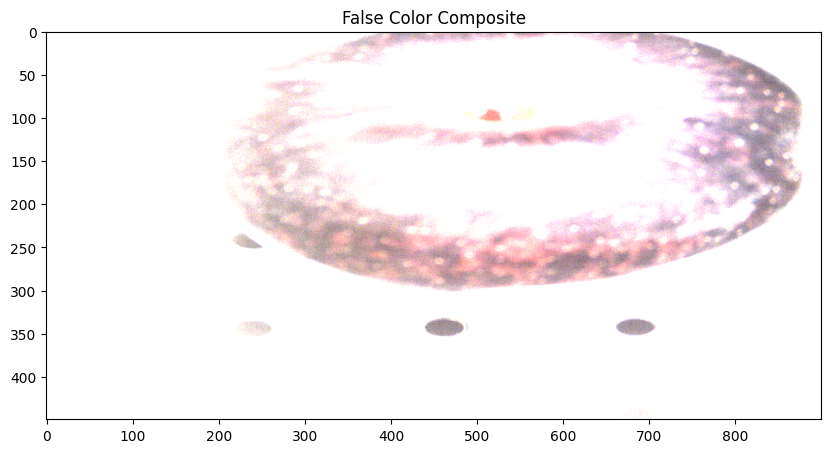

In [20]:
import matplotlib.pyplot as plt
# Choose bands for a false-color composite
nir_band = 75
red_band = 50
green_band = 25

# Plot the false-color composite
plt.figure(figsize=(10, 6))
plt.imshow(np.stack([data[nir_band, :, :], data[red_band, :, :], data[green_band, :, :]], axis=-1))
plt.title('False Color Composite')
plt.show()


In [22]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_bil_file(bil_file_path):
    with rasterio.open(bil_file_path) as src:
        data = src.read()
        wavelengths = src.meta['wavelength']

    return data, wavelengths

# Replace 'your_fresh_file.bil' and 'your_high_concentration_file.bil' with the actual file paths
fresh_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
high_concentration_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'

# Read data and wavelengths for fresh apples
fresh_data, wavelengths = read_bil_file(fresh_file_path)

# Read data and wavelengths for apples with high concentration
high_concentration_data, _ = read_bil_file(high_concentration_file_path)

# Choose a few pixels for visualization (you can adjust these indices)
pixel_indices = [(100, 100), (150, 150), (200, 200)]

# Plot spectral profiles for fresh apples
plt.figure(figsize=(12, 8))
plt.title('Spectral Profiles - Fresh Apples')
for pixel_index in pixel_indices:
    spectrum = fresh_data[:, pixel_index[0], pixel_index[1]]
    plt.plot(wavelengths, spectrum, label=f'Pixel {pixel_index}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Plot spectral profiles for apples with high concentration
plt.figure(figsize=(12, 8))
plt.title('Spectral Profiles - Apples with High Concentration')
for pixel_index in pixel_indices:
    spectrum = high_concentration_data[:, pixel_index[0], pixel_index[1]]
    plt.plot(wavelengths, spectrum, label=f'Pixel {pixel_index}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()


KeyError: 'wavelength'

ValueError: x and y must have same first dimension, but have shapes (0,) and (300,)

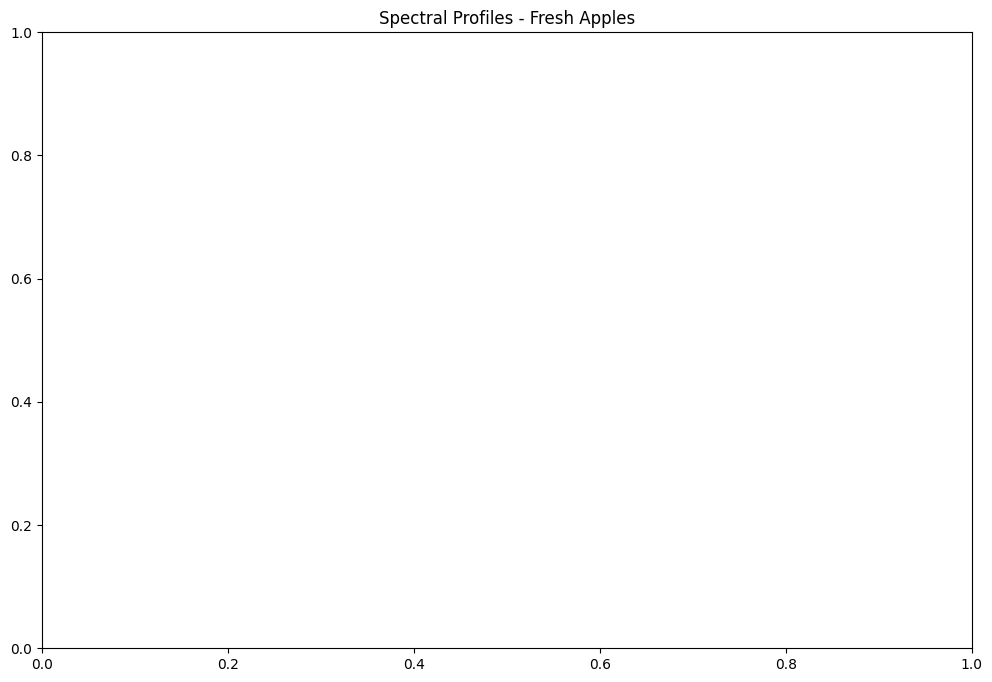

In [23]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def read_bil_data(bil_path):
    with rasterio.open(bil_path) as src:
        data = src.read()
        return data

def read_wavelengths(hdr_path):
    wavelengths = []
    with open(hdr_path, 'r') as hdr_file:
        for line in hdr_file:
            if line.startswith('Wavelength'):
                wavelengths = [float(w) for w in line.split('=')[1].split(',')]
    return np.array(wavelengths)

# Replace these paths with your actual file paths
fresh_apple_bil_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
fresh_apple_hdr_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr'
high_concentration_bil_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'
high_concentration_hdr_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr'

# Read data and wavelengths
fresh_apple_data = read_bil_data(fresh_apple_bil_path)
fresh_apple_wavelengths = read_wavelengths(fresh_apple_hdr_path)

high_concentration_data = read_bil_data(high_concentration_bil_path)
high_concentration_wavelengths = read_wavelengths(high_concentration_hdr_path)

# Choose a few pixels for visualization (you can adjust these indices)
pixel_indices = [(100, 100), (150, 150), (200, 200)]

# Plot spectral profiles for fresh apples
plt.figure(figsize=(12, 8))
plt.title('Spectral Profiles - Fresh Apples')
for pixel_index in pixel_indices:
    spectrum = fresh_apple_data[:, pixel_index[0], pixel_index[1]]
    plt.plot(fresh_apple_wavelengths, spectrum, label=f'Pixel {pixel_index}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Plot spectral profiles for apples with high concentration
plt.figure(figsize=(12, 8))
plt.title('Spectral Profiles - Apples with High Concentration')
for pixel_index in pixel_indices:
    spectrum = high_concentration_data[:, pixel_index[0], pixel_index[1]]
    plt.plot(high_concentration_wavelengths, spectrum, label=f'Pixel {pixel_index}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()


In [24]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def read_bil_data(bil_path):
    with rasterio.open(bil_path) as src:
        data = src.read()
        return data

def read_wavelengths(hdr_path):
    wavelengths = []
    with open(hdr_path, 'r') as hdr_file:
        for line in hdr_file:
            if line.startswith('Wavelength'):
                wavelengths = [float(w) for w in line.split('=')[1].split(',')]
    return np.array(wavelengths)

# Replace these paths with your actual file paths
fresh_apple_bil_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
fresh_apple_hdr_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr'
high_concentration_bil_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'
high_concentration_hdr_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr'


# Read data and wavelengths
fresh_apple_data = read_bil_data(fresh_apple_bil_path)
fresh_apple_wavelengths = read_wavelengths(fresh_apple_hdr_path)

high_concentration_data = read_bil_data(high_concentration_bil_path)
high_concentration_wavelengths = read_wavelengths(high_concentration_hdr_path)

# Check dimensions
if fresh_apple_data.shape[0] == 0 or fresh_apple_data.shape[0] != len(fresh_apple_wavelengths):
    raise ValueError("Invalid dimensions for fresh apple data and wavelengths")

if high_concentration_data.shape[0] == 0 or high_concentration_data.shape[0] != len(high_concentration_wavelengths):
    raise ValueError("Invalid dimensions for high concentration data and wavelengths")

# Choose a few pixels for visualization (you can adjust these indices)
pixel_indices = [(100, 100), (150, 150), (200, 200)]

# Plot spectral profiles for fresh apples
plt.figure(figsize=(12, 8))
plt.title('Spectral Profiles - Fresh Apples')
for pixel_index in pixel_indices:
    spectrum = fresh_apple_data[:, pixel_index[0], pixel_index[1]]
    plt.plot(fresh_apple_wavelengths, spectrum, label=f'Pixel {pixel_index}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

# Plot spectral profiles for apples with high concentration
plt.figure(figsize=(12, 8))
plt.title('Spectral Profiles - Apples with High Concentration')
for pixel_index in pixel_indices:
    spectrum = high_concentration_data[:, pixel_index[0], pixel_index[1]]
    plt.plot(high_concentration_wavelengths, spectrum, label=f'Pixel {pixel_index}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.legend()
plt.show()


ValueError: Invalid dimensions for fresh apple data and wavelengths

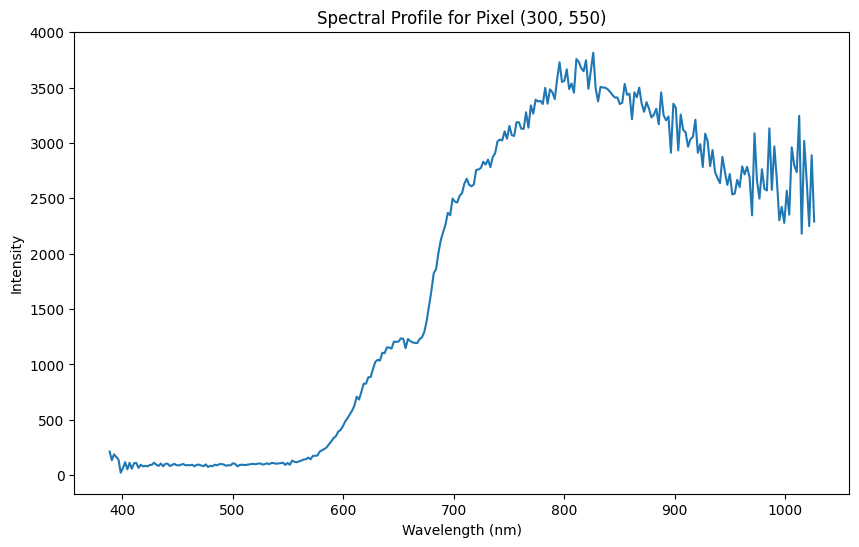

In [25]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_file.bil' with the actual file name
bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil'
hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Fresh/1_1PU.bil.hdr'

# Read the data
with rasterio.open(bil_file_path) as src:
    data = src.read()

# Read the HDR file to get wavelength information
hdr_metadata = {}
with open(hdr_file_path, 'r') as hdr_file:
    for line in hdr_file:
        if '=' not in line:
            continue
        key, *value_parts = map(str.strip, line.split('='))
        value = '='.join(value_parts)
        hdr_metadata[key] = value

# Extract and convert wavelength information from the HDR metadata
wavelength_str = hdr_metadata['wavelength'][1:-1]  # Remove curly braces
wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
# 550 X 900
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, data[:, pixel_index[0], pixel_index[1]])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index}')
plt.show()

# 100 PIXELS VISUALIZED

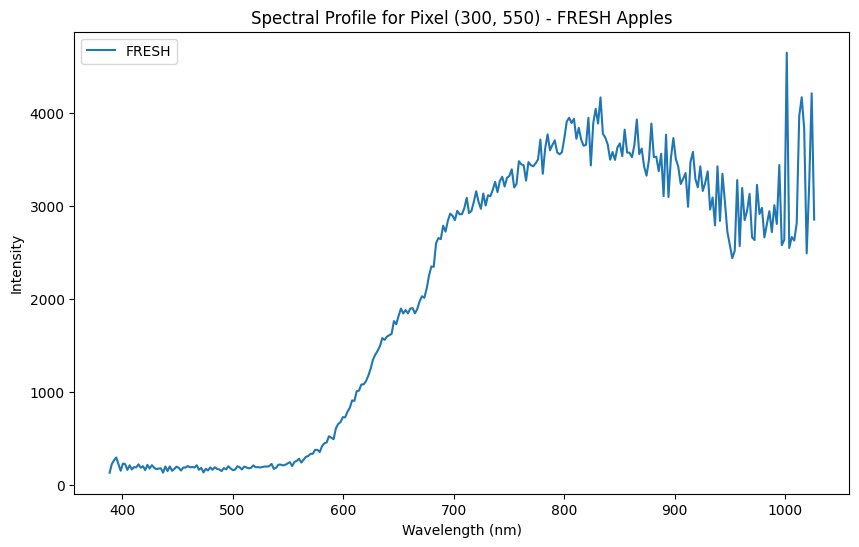

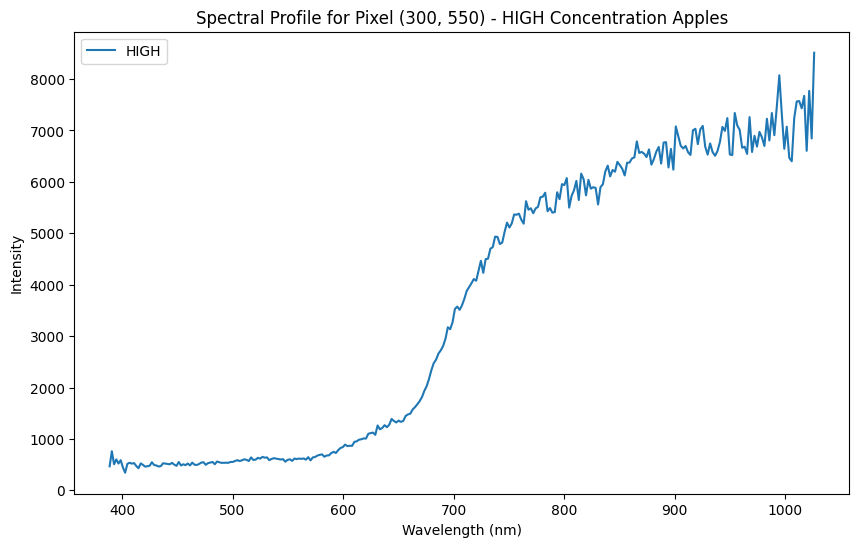

In [26]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_data(bil_file_path, hdr_file_path):
    with rasterio.open(bil_file_path) as src:
        data = src.read()

    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value

    wavelength_str = hdr_metadata['wavelength'][1:-1]
    wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

    return data, wavelengths

# Replace 'your_file.bil' and 'your_file.bil.hdr' with the actual file names
fresh_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
fresh_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr'
high_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'
high_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr'

# Read data for FRESH apples
fresh_data, fresh_wavelengths = read_data(fresh_bil_file_path, fresh_hdr_file_path)

# Read data for HIGH concentration apples
high_data, high_wavelengths = read_data(high_bil_file_path, high_hdr_file_path)

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel for FRESH apples
plt.figure(figsize=(10, 6))
plt.plot(fresh_wavelengths, fresh_data[:, pixel_index[0], pixel_index[1]], label='FRESH')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - FRESH Apples')
plt.legend()
plt.show()

# Plot the spectral profile for the chosen pixel for HIGH concentration apples
plt.figure(figsize=(10, 6))
plt.plot(high_wavelengths, high_data[:, pixel_index[0], pixel_index[1]], label='HIGH')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - HIGH Concentration Apples')
plt.legend()
plt.show()


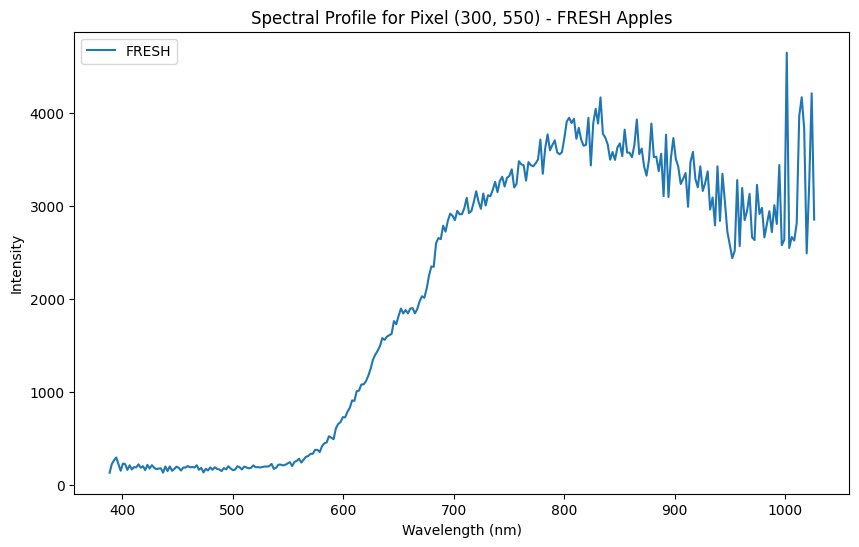

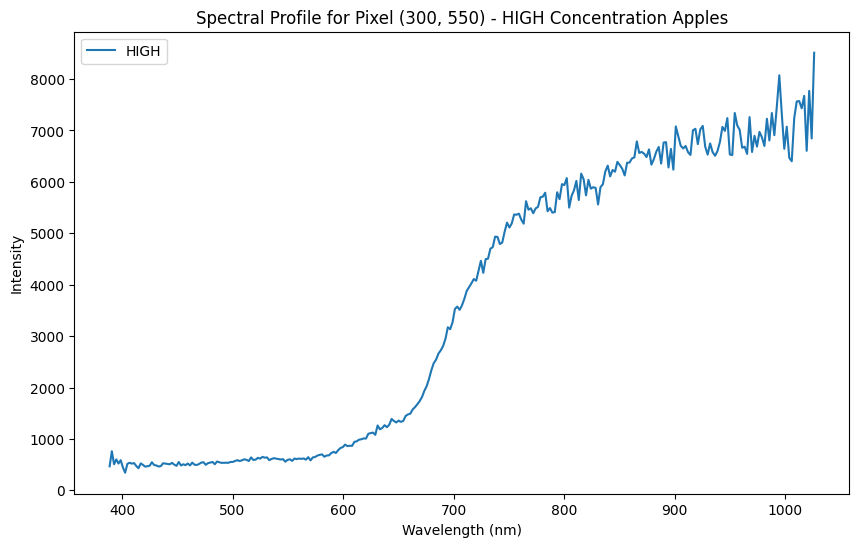

Wavelength with Maximum Difference: 686.21 nm


In [27]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_data(bil_file_path, hdr_file_path):
    with rasterio.open(bil_file_path) as src:
        data = src.read()

    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value

    wavelength_str = hdr_metadata['wavelength'][1:-1]
    wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

    return data, wavelengths

def find_drastic_change_wavelength(profile1, profile2):
    absolute_difference = np.abs(profile1 - profile2)
    max_difference_index = np.argmax(absolute_difference)
    return max_difference_index



# Read data for FRESH apples
fresh_data, fresh_wavelengths = read_data(fresh_bil_file_path, fresh_hdr_file_path)

# Read data for HIGH concentration apples
high_data, high_wavelengths = read_data(high_bil_file_path, high_hdr_file_path)

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel for FRESH apples
plt.figure(figsize=(10, 6))
plt.plot(fresh_wavelengths, fresh_data[:, pixel_index[0], pixel_index[1]], label='FRESH')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - FRESH Apples')
plt.legend()
plt.show()

# Plot the spectral profile for the chosen pixel for HIGH concentration apples
plt.figure(figsize=(10, 6))
plt.plot(high_wavelengths, high_data[:, pixel_index[0], pixel_index[1]], label='HIGH')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - HIGH Concentration Apples')
plt.legend()
plt.show()

# Find the wavelength with the maximum difference
max_difference_wavelength = fresh_wavelengths[find_drastic_change_wavelength(
    fresh_data[:, pixel_index[0], pixel_index[1]],
    high_data[:, pixel_index[0], pixel_index[1]]
)]

print(f"Wavelength with Maximum Difference: {max_difference_wavelength} nm")


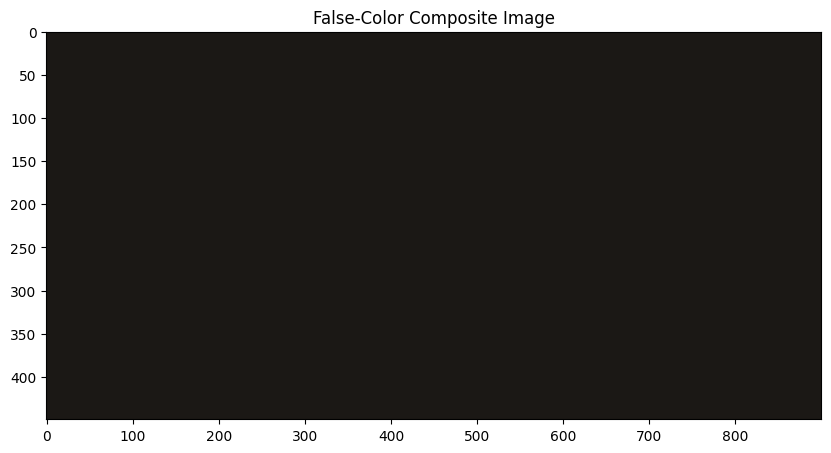

In [28]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual file paths
fresh_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
fresh_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr'
high_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'
high_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr'

# Read the data
with rasterio.open(fresh_bil_file_path) as fresh_src, rasterio.open(high_bil_file_path) as high_src:
    fresh_data = fresh_src.read()
    high_data = high_src.read()

# Read the HDR files to get wavelength information
def read_wavelength(hdr_file_path):
    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value
    return np.array([float(w) for w in hdr_metadata['wavelength'][1:-1].split(', ')])

fresh_wavelengths = read_wavelength(fresh_hdr_file_path)
high_wavelengths = read_wavelength(high_hdr_file_path)

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
pixel_index = (300, 550)

# Find the index of the identified wavelength in the wavelength arrays
identified_wavelength = 686.21
fresh_identified_wavelength_index = np.argmin(np.abs(fresh_wavelengths - identified_wavelength))
high_identified_wavelength_index = np.argmin(np.abs(high_wavelengths - identified_wavelength))

# Extract spectral values at the identified wavelength
fresh_intensity = fresh_data[fresh_identified_wavelength_index, pixel_index[0], pixel_index[1]]
high_intensity = high_data[high_identified_wavelength_index, pixel_index[0], pixel_index[1]]

# Normalize intensities to be in the range [0, 1]
normalized_fresh_intensity = (fresh_intensity - np.min(fresh_data)) / (np.max(fresh_data) - np.min(fresh_data))
normalized_high_intensity = (high_intensity - np.min(high_data)) / (np.max(high_data) - np.min(high_data))

# Create a false-color composite image
rgb_image = np.zeros((3, fresh_data.shape[1], fresh_data.shape[2]))
rgb_image[0, :, :] = normalized_high_intensity  # Red channel
rgb_image[1, :, :] = 0.5 * (normalized_fresh_intensity + normalized_high_intensity)  # Green channel
rgb_image[2, :, :] = normalized_fresh_intensity  # Blue channel

# Plot the RGB composite image
plt.figure(figsize=(10, 6))
plt.imshow(np.transpose(rgb_image, (1, 2, 0)))
plt.title('False-Color Composite Image')
plt.show()


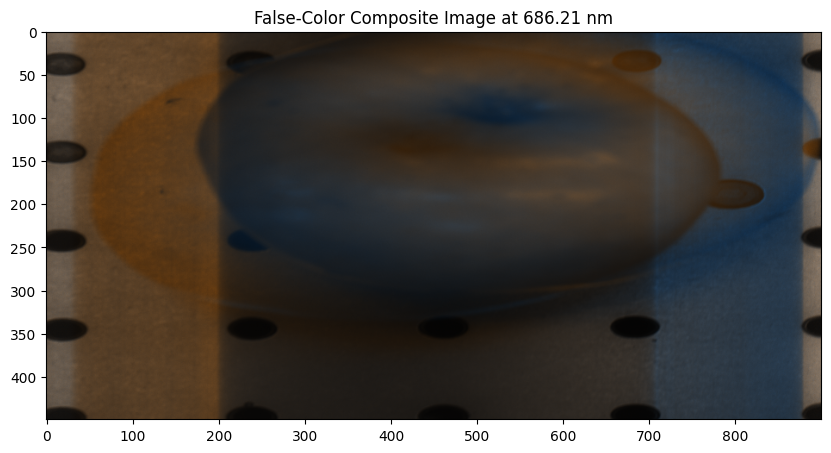

In [30]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual file paths
fresh_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
fresh_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr'
high_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'
high_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr'

# Read the data
with rasterio.open(fresh_bil_file_path) as fresh_src, rasterio.open(high_bil_file_path) as high_src:
    fresh_data = fresh_src.read()
    high_data = high_src.read()

# Read the HDR files to get wavelength information
def read_wavelength(hdr_file_path):
    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value
    return np.array([float(w) for w in hdr_metadata['wavelength'][1:-1].split(', ')])

fresh_wavelengths = read_wavelength(fresh_hdr_file_path)
high_wavelengths = read_wavelength(high_hdr_file_path)

# Find the index of the identified wavelength in the wavelength arrays
identified_wavelength = 686.21
fresh_identified_wavelength_index = np.argmin(np.abs(fresh_wavelengths - identified_wavelength))
high_identified_wavelength_index = np.argmin(np.abs(high_wavelengths - identified_wavelength))

# Extract spectral values at the identified wavelength
fresh_intensity = fresh_data[fresh_identified_wavelength_index, :, :]
high_intensity = high_data[high_identified_wavelength_index, :, :]

# Normalize intensities to be in the range [0, 1]
normalized_fresh_intensity = (fresh_intensity - np.min(fresh_data)) / (np.max(fresh_data) - np.min(fresh_data))
normalized_high_intensity = (high_intensity - np.min(high_data)) / (np.max(high_data) - np.min(high_data))

# Create a false-color composite image
rgb_image = np.zeros((3, fresh_data.shape[1], fresh_data.shape[2]))
rgb_image[0, :, :] = normalized_high_intensity  # Red channel
rgb_image[1, :, :] = 0.5 * (normalized_fresh_intensity + normalized_high_intensity)  # Green channel
rgb_image[2, :, :] = normalized_fresh_intensity  # Blue channel

# Clip values to [0, 1]
rgb_image = np.clip(rgb_image, 0, 1)

# Plot the RGB composite image
plt.figure(figsize=(10, 6))
plt.imshow(np.transpose(rgb_image, (1, 2, 0)))
plt.title(f'False-Color Composite Image at {identified_wavelength} nm')
plt.show()


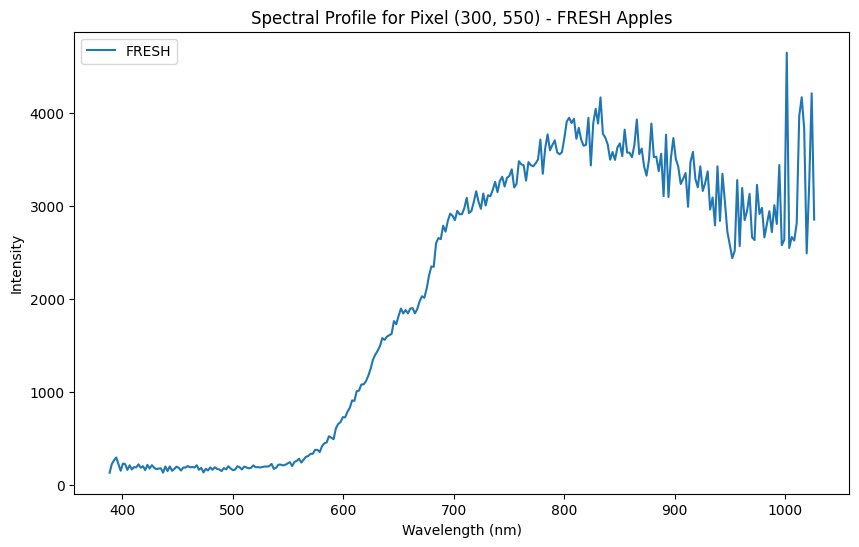

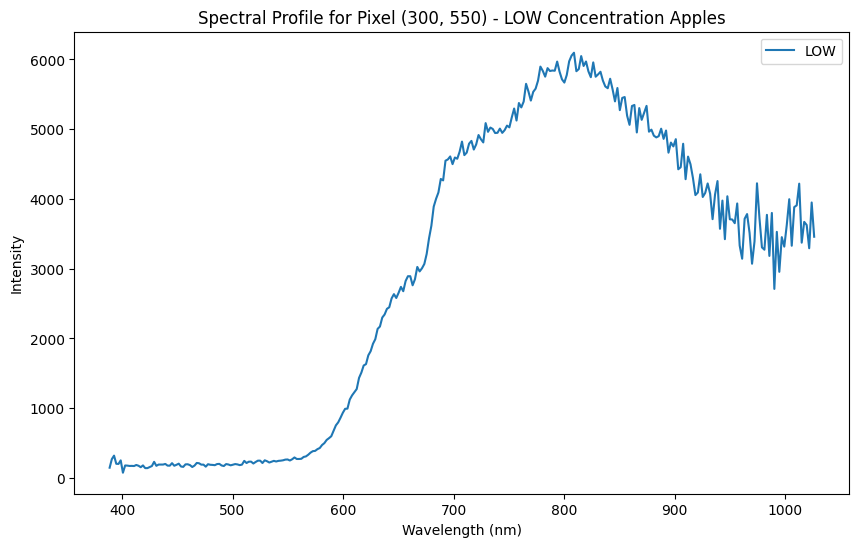

Wavelength with Maximum Difference: 479.88 nm


In [31]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_data(bil_file_path, hdr_file_path):
    with rasterio.open(bil_file_path) as src:
        data = src.read()

    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value

    wavelength_str = hdr_metadata['wavelength'][1:-1]
    wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

    return data, wavelengths

def find_drastic_change_wavelength(profile1, profile2):
    absolute_difference = np.abs(profile1 - profile2)
    max_difference_index = np.argmax(absolute_difference)
    return max_difference_index

fresh_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
fresh_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr'
high_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil'
high_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil.hdr'


# Read data for FRESH apples
fresh_data, fresh_wavelengths = read_data(fresh_bil_file_path, fresh_hdr_file_path)

# Read data for HIGH concentration apples
high_data, high_wavelengths = read_data(high_bil_file_path, high_hdr_file_path)

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel for FRESH apples
plt.figure(figsize=(10, 6))
plt.plot(fresh_wavelengths, fresh_data[:, pixel_index[0], pixel_index[1]], label='FRESH')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - FRESH Apples')
plt.legend()
plt.show()

# Plot the spectral profile for the chosen pixel for HIGH concentration apples
plt.figure(figsize=(10, 6))
plt.plot(high_wavelengths, high_data[:, pixel_index[0], pixel_index[1]], label='LOW')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - LOW Concentration Apples')
plt.legend()
plt.show()

# Find the wavelength with the maximum difference
max_difference_wavelength = fresh_wavelengths[find_drastic_change_wavelength(
    fresh_data[:, pixel_index[0], pixel_index[1]],
    high_data[:, pixel_index[0], pixel_index[1]]
)]

print(f"Wavelength with Maximum Difference: {max_difference_wavelength} nm")


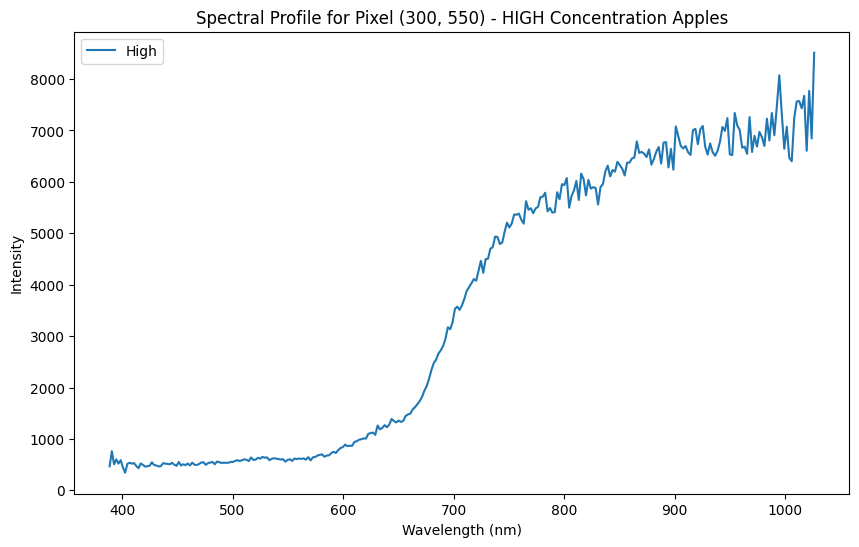

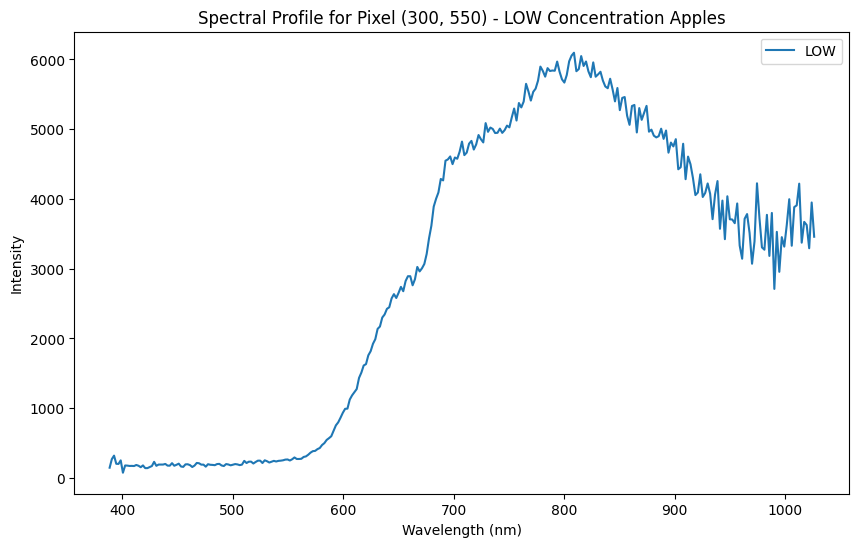

Wavelength with Maximum Difference: 737.49 nm


In [33]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_data(bil_file_path, hdr_file_path):
    with rasterio.open(bil_file_path) as src:
        data = src.read()

    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value

    wavelength_str = hdr_metadata['wavelength'][1:-1]
    wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

    return data, wavelengths

def find_drastic_change_wavelength(profile1, profile2):
    absolute_difference = np.abs(profile1 - profile2)
    max_difference_index = np.argmax(absolute_difference)
    return max_difference_index

fresh_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil'
fresh_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/High/A1_H1.bil.hdr'
high_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil'
high_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Low/A1_L1.bil.hdr'


# Read data for FRESH apples
fresh_data, fresh_wavelengths = read_data(fresh_bil_file_path, fresh_hdr_file_path)

# Read data for HIGH concentration apples
high_data, high_wavelengths = read_data(high_bil_file_path, high_hdr_file_path)

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel for FRESH apples
plt.figure(figsize=(10, 6))
plt.plot(fresh_wavelengths, fresh_data[:, pixel_index[0], pixel_index[1]], label='High')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - HIGH Concentration Apples')
plt.legend()
plt.show()

# Plot the spectral profile for the chosen pixel for HIGH concentration apples
plt.figure(figsize=(10, 6))
plt.plot(high_wavelengths, high_data[:, pixel_index[0], pixel_index[1]], label='LOW')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - LOW Concentration Apples')
plt.legend()
plt.show()

# Find the wavelength with the maximum difference
max_difference_wavelength = fresh_wavelengths[find_drastic_change_wavelength(
    fresh_data[:, pixel_index[0], pixel_index[1]],
    high_data[:, pixel_index[0], pixel_index[1]]
)]

print(f"Wavelength with Maximum Difference: {max_difference_wavelength} nm")


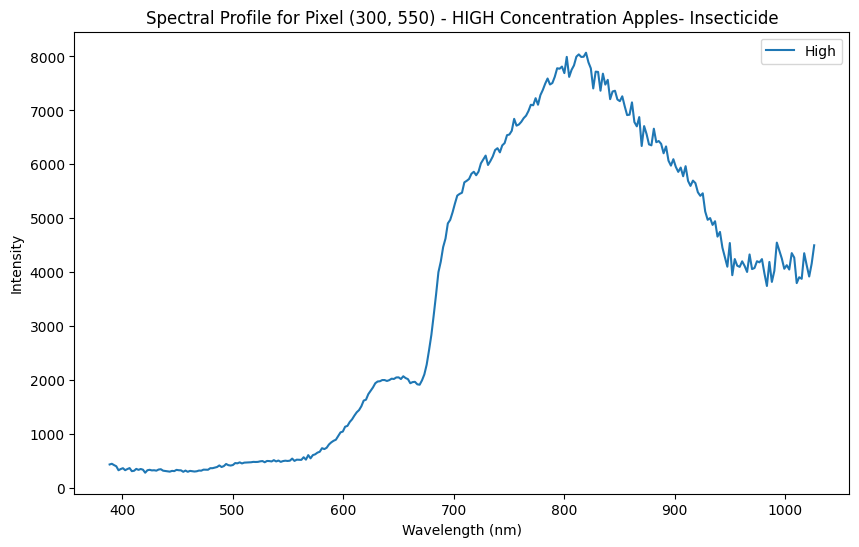

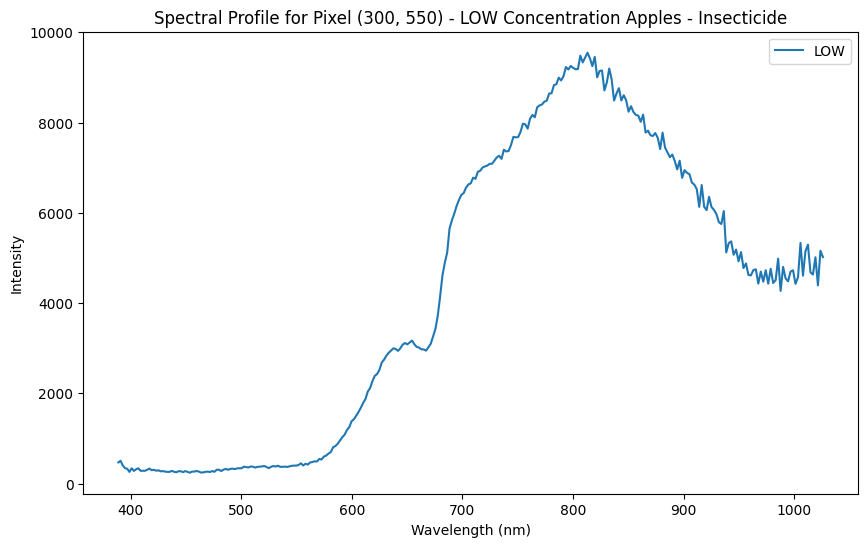

Wavelength with Maximum Difference: 421.01 nm


In [35]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_data(bil_file_path, hdr_file_path):
    with rasterio.open(bil_file_path) as src:
        data = src.read()

    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value

    wavelength_str = hdr_metadata['wavelength'][1:-1]
    wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

    return data, wavelengths

def find_drastic_change_wavelength(profile1, profile2):
    absolute_difference = np.abs(profile1 - profile2)
    max_difference_index = np.argmax(absolute_difference)
    return max_difference_index

fresh_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil'
fresh_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/High/1_1HG.bil.hdr'
high_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil'
high_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil.hdr'


# Read data for FRESH apples
fresh_data, fresh_wavelengths = read_data(fresh_bil_file_path, fresh_hdr_file_path)

# Read data for HIGH concentration apples
high_data, high_wavelengths = read_data(high_bil_file_path, high_hdr_file_path)

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel for FRESH apples
plt.figure(figsize=(10, 6))
plt.plot(fresh_wavelengths, fresh_data[:, pixel_index[0], pixel_index[1]], label='High')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - HIGH Concentration Apples- Insecticide')
plt.legend()
plt.show()

# Plot the spectral profile for the chosen pixel for HIGH concentration apples
plt.figure(figsize=(10, 6))
plt.plot(high_wavelengths, high_data[:, pixel_index[0], pixel_index[1]], label='LOW')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - LOW Concentration Apples - Insecticide')
plt.legend()
plt.show()

# Find the wavelength with the maximum difference
max_difference_wavelength = fresh_wavelengths[find_drastic_change_wavelength(
    fresh_data[:, pixel_index[0], pixel_index[1]],
    high_data[:, pixel_index[0], pixel_index[1]]
)]

print(f"Wavelength with Maximum Difference: {max_difference_wavelength} nm")


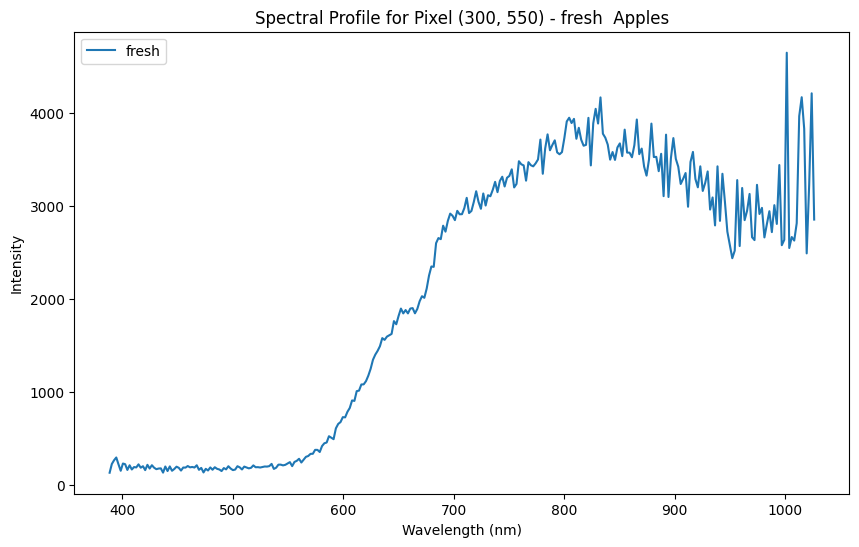

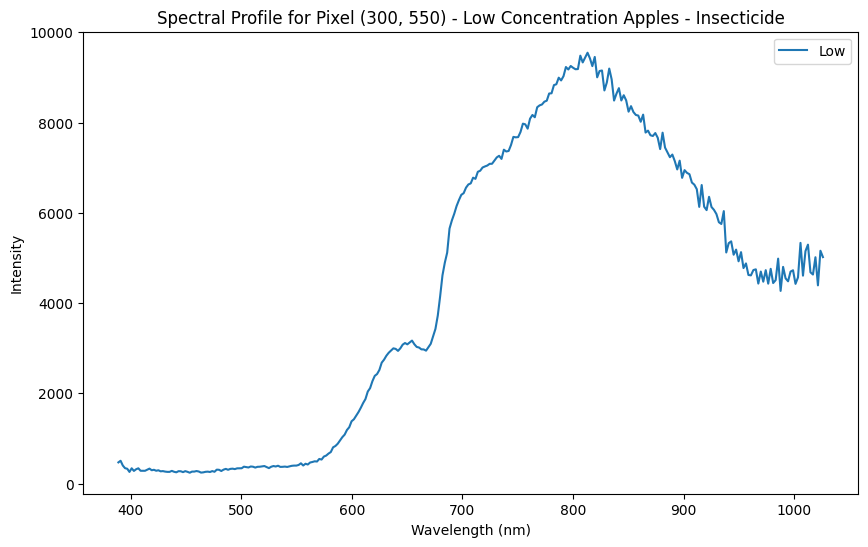

Wavelength with Maximum Difference: 394.86 nm


In [38]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_data(bil_file_path, hdr_file_path):
    with rasterio.open(bil_file_path) as src:
        data = src.read()

    hdr_metadata = {}
    with open(hdr_file_path, 'r') as hdr_file:
        for line in hdr_file:
            if '=' not in line:
                continue
            key, *value_parts = map(str.strip, line.split('='))
            value = '='.join(value_parts)
            hdr_metadata[key] = value

    wavelength_str = hdr_metadata['wavelength'][1:-1]
    wavelengths = np.array([float(w) for w in wavelength_str.split(', ')])

    return data, wavelengths

def find_drastic_change_wavelength(profile1, profile2):
    absolute_difference = np.abs(profile1 - profile2)
    max_difference_index = np.argmax(absolute_difference)
    return max_difference_index

fresh_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil'
fresh_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Nativo/Fresh/A1_F1.bil.hdr'
high_bil_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil'
high_hdr_file_path = 'D:/SRM/3rd Year/UROP/Apple_Hyper_Spectral/Apples-bil/Apple_samples/Apple_samples/Monostar/Low/1_1LW.bil.hdr'


# Read data for FRESH apples
fresh_data, fresh_wavelengths = read_data(fresh_bil_file_path, fresh_hdr_file_path)

# Read data for HIGH concentration apples
high_data, high_wavelengths = read_data(high_bil_file_path, high_hdr_file_path)

# Choose a specific pixel index (you can change this to any value within the dimensions of your data)
pixel_index = (300, 550)

# Plot the spectral profile for the chosen pixel for FRESH apples
plt.figure(figsize=(10, 6))
plt.plot(fresh_wavelengths, fresh_data[:, pixel_index[0], pixel_index[1]], label='fresh')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - fresh  Apples')
plt.legend()
plt.show()

# Plot the spectral profile for the chosen pixel for HIGH concentration apples
plt.figure(figsize=(10, 6))
plt.plot(high_wavelengths, high_data[:, pixel_index[0], pixel_index[1]], label='Low')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title(f'Spectral Profile for Pixel {pixel_index} - Low Concentration Apples - Insecticide')
plt.legend()
plt.show()

# Find the wavelength with the maximum difference
max_difference_wavelength = fresh_wavelengths[find_drastic_change_wavelength(
    fresh_data[:, pixel_index[0], pixel_index[1]],
    high_data[:, pixel_index[0], pixel_index[1]]
)]

print(f"Wavelength with Maximum Difference: {max_difference_wavelength} nm")
